# Introduction

The original dataset contains **330 features (columns)**. However, based on research into diabetes and related chronic health conditions, the dataset publisher has cleaned the **BRFSS** data and transformed it into a **format suitable for machine learning algorithms**.  
__________________________________________________________________________________________________________________________

**Key Risk Factors for Diabetes:**

(high blood pressure, high cholesterol, smoking, diabetes, obesity, age, sex, race, diet, exercise, alcohol consumption, BMI, household income, marital status, sleep, time since last checkup, education, health care coverage, mental health)  
___________________________________________________________________________________________________________________________

### Column Descriptions:

**Diabetes_binary** : Indicates whether the respondent has diabetes (0 = No, 1 = Yes)

**HighBP** : Respondent has been told by a health professional that they have high blood pressure (0 = No, 1 = Yes)

**HighChol** : Respondent has ever been told by a health professional that their blood cholesterol is high (0 = No, 1 = Yes)

**CholCheck** : Had a cholesterol check within the past five years (0 = No, 1 = Yes)

**BMI** : Body Mass Index (BMI)

**Smoker** : Has smoked at least 100 cigarettes in their lifetime (0 = No, 1 = Yes)  
[Note: 5 packs = 100 cigarettes]

**Stroke** : Respondent has ever been told they had a stroke (0 = No, 1 = Yes)

**HeartDiseaseorAttack** : Respondent has ever been told they have coronary heart disease (CHD) or had a heart attack (myocardial infarction) (0 = No, 1 = Yes)

**PhysActivity** : Participated in physical activity or exercise (outside of regular job) in the past 30 days (0 = No, 1 = Yes)

**Fruits** : Consumes fruit one or more times per day (0 = No, 1 = Yes)

**Veggies** : Consumes vegetables one or more times per day (0 = No, 1 = Yes)

**HvyAlcoholConsump** : Heavy drinker (men: >14 drinks/week, women: >7 drinks/week) (0 = No, 1 = Yes)

**AnyHealthcare** : Has some form of health care coverage (e.g., insurance, HMO, Medicare, Indian Health Service) (0 = No, 1 = Yes)

**NoDocbcCost** : Needed to see a doctor in the past 12 months but couldn’t due to cost (0 = No, 1 = Yes)

**GenHlth** : General health rating (1 = Excellent to 5 = Poor)

**MentHlth** : Number of days in the past 30 when mental health was not good (0–30)

**PhysHlth** : Number of days in the past 30 when physical health was not good (0–30)

**DiffWalk** : Has serious difficulty walking or climbing stairs (0 = No, 1 = Yes)

**Sex** : Respondent’s sex (0 = Female, 1 = Male)

**Age** : Age categorized into 14 groups (1–14)

**Education** : Highest level of education completed (1–6)

**Income** : Annual household income bracket (1–8; "Refused" responses are coded separately)


# Import Libraries

_________________________________________________________________________________________________________________________

In [5]:
!pip install ydata-profiling 
!pip install -U scikit-learn imbalanced-learn
!pip install mlxtend



In [6]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from ydata_profiling import ProfileReport
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix,RocCurveDisplay, classification_report
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

________________________________________________________________________________________________________________

# Data Exploring 

______________________________________________________________________________________________________________________

In [10]:
Orginal_data = pd.read_csv("/Users/edwardbrown/Documents/OnePATH/Datasets/archive-2/diabetes_binary_health_indicators_BRFSS2015.csv" , sep = "," , encoding = 'utf-8')

In [11]:
data = pd.read_csv("/Users/edwardbrown/Documents/OnePATH/Datasets/archive-2/diabetes_binary_health_indicators_BRFSS2015.csv" , sep = "," , encoding = 'utf-8')

__________________________________________________________________________________________________________________

## Dataset Report

In [14]:
profile = ProfileReport(data)

In [15]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


%|                                                    | 0/22 [00:00<?, ?it/s]
%|██                                          | 1/22 [00:00<00:04,  5.12it/s]
100%|███████████████████████████████████████████| 22/22 [00:00<00:00, 54.05it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
data.shape 

(253680, 22)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [18]:
data.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

In [19]:
data.describe()

Diabetes_binary         HighBP       HighChol      CholCheck  \
count    253680.000000  253680.000000  253680.000000  253680.000000   
mean          0.139333       0.429001       0.424121       0.962670   
std           0.346294       0.494934       0.494210       0.189571   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       1.000000   
50%           0.000000       0.000000       0.000000       1.000000   
75%           0.000000       1.000000       1.000000       1.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000              0.000000   
25%        24.000000       0.000000       0.000000              0.000000   
50%        27.000000       0.000000       0.000000              0.000000   
75%        31.000000       1.000000       0.000000              0.000000   
max        98.000000       1.000000       1.000000              1.000000   

        PhysActivity         Fruits  ...  AnyHealthcare    NoDocbcCost  \
count  253680.000000  253680.000000  ...  253680.000000  253680.000000   
mean        0.756544       0.634256  ...       0.951053       0.084177   
std         0.429169       0.481639  ...       0.215759       0.277654   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         1.000000       0.000000  ...       1.000000       0.000000   
50%         1.000000       1.000000  ...       1.000000       0.000000   
75%         1.000000       1.000000  ...       1.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

             GenHlth       MentHlth       PhysHlth       DiffWalk  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        2.511392       3.184772       4.242081       0.168224   
std         1.068477       7.412847       8.717951       0.374066   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         2.000000       0.000000       0.000000       0.000000   
75%         3.000000       2.000000       3.000000       0.000000   
max         5.000000      30.000000      30.000000       1.000000   

                 Sex            Age      Education         Income  
count  253680.000000  253680.000000  253680.000000  253680.000000  
mean        0.440342       8.032119       5.050434       6.053875  
std         0.496429       3.054220       0.985774       2.071148  
min         0.000000       1.000000       1.000000       1.000000  
25%         0.000000       6.000000       4.000000       5.000000  
50%         0.000000       8.000000       5.000000       7.000000  
75%         1.000000      10.000000       6.000000       8.000000  
max         1.000000      13.000000       6.000000       8.000000  

[8 rows x 22 columns]

_____________________________________________________________________________________________________________________________

# Preprocessing

___________________________________________________________________________________________________________________

In [23]:
#Transform data to integers

In [24]:
data["Diabetes_binary"] = data["Diabetes_binary"].astype(int)
data["HighBP"] = data["HighBP"].astype(int)
data["HighChol"] = data["HighChol"].astype(int)
data["CholCheck"] = data["CholCheck"].astype(int)
data["BMI"] = data["BMI"].astype(int)
data["Smoker"] = data["Smoker"].astype(int)
data["Stroke"] = data["Stroke"].astype(int)
data["HeartDiseaseorAttack"] = data["HeartDiseaseorAttack"].astype(int)
data["PhysActivity"] = data["PhysActivity"].astype(int)
data["Fruits"] = data["Fruits"].astype(int) 
data["Veggies"] = data["Veggies"].astype(int)
data["HvyAlcoholConsump"] = data["HvyAlcoholConsump"].astype(int)
data["AnyHealthcare"] = data["AnyHealthcare"].astype(int)
data["NoDocbcCost"] = data["NoDocbcCost"].astype(int)
data["GenHlth"] = data["GenHlth"].astype(int)
data["MentHlth"] = data["MentHlth"].astype(int)
data["PhysHlth"] = data["PhysHlth"].astype(int)
data["DiffWalk"] = data["DiffWalk"].astype(int)
data["Sex"] = data["Sex"].astype(int)
data["Age"] = data["Age"].astype(int)
data["Education"] = data["Education"].astype(int)
data["Income"] =data["Income"].astype(int)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

**Check null values**

In [27]:
data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

**checking unique values in different variables**

In [29]:
unique_values = {}
for col in data.columns:
    unique_values[col] = data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

unique value count
Diabetes_binary                        2
HighBP                                 2
HighChol                               2
CholCheck                              2
BMI                                   84
Smoker                                 2
Stroke                                 2
HeartDiseaseorAttack                   2
PhysActivity                           2
Fruits                                 2
Veggies                                2
HvyAlcoholConsump                      2
AnyHealthcare                          2
NoDocbcCost                            2
GenHlth                                5
MentHlth                              31
PhysHlth                              31
DiffWalk                               2
Sex                                    2
Age                                   13
Education                              6
Income                                 8

In [30]:
#View the value counts for entire dataset
def v_counts(dataframe):
    for i in dataframe :
        print(dataframe[i].value_counts())
        print("_____________________________________________________________________________")

In [31]:
v_counts(data)

Diabetes_binary
0    218334
1     35346
Name: count, dtype: int64
_____________________________________________________________________________
HighBP
0    144851
1    108829
Name: count, dtype: int64
_____________________________________________________________________________
HighChol
0    146089
1    107591
Name: count, dtype: int64
_____________________________________________________________________________
CholCheck
1    244210
0      9470
Name: count, dtype: int64
_____________________________________________________________________________
BMI
27    24606
26    20562
24    19550
25    17146
28    16545
      ...  
85        1
91        1
86        1
90        1
78        1
Name: count, Length: 84, dtype: int64
_____________________________________________________________________________
Smoker
0    141257
1    112423
Name: count, dtype: int64
_____________________________________________________________________________
Stroke
0    243388
1     10292
Name: count, dtype: int64
__

_______________________________________________________________________________________________________

**Check The Outliers**

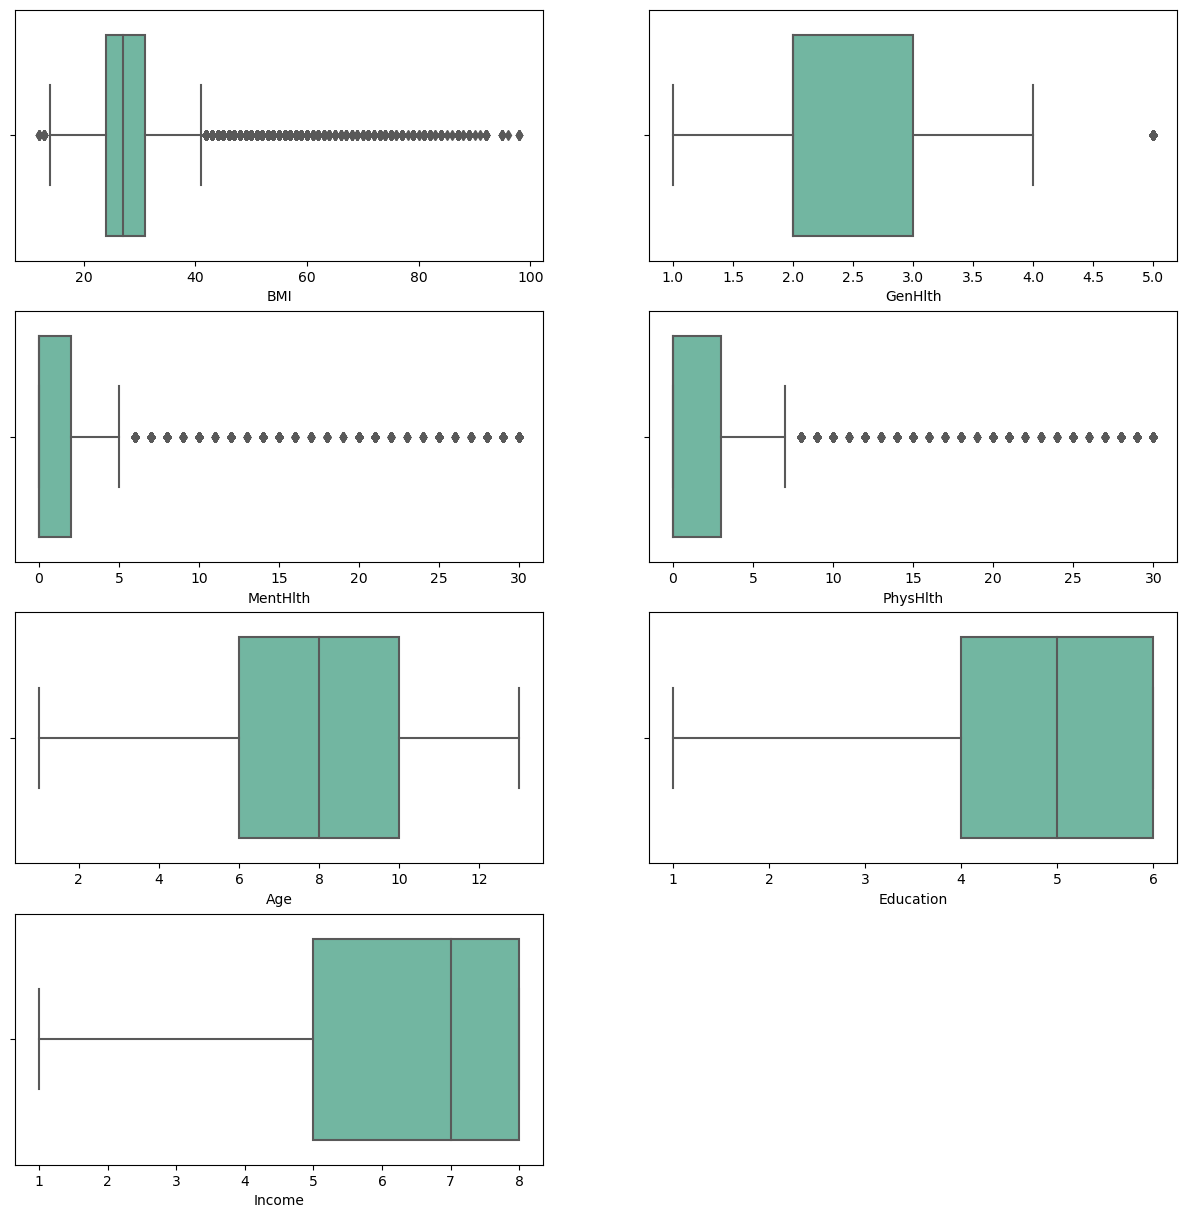

In [34]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = data ,palette='Set2')
plt.show()

there is no outlayers in our data 

_____________________________________________________________________________________________________

**Check and then drop the duplicate data**

In [38]:
data.duplicated().sum()

24206

In [39]:
data.drop_duplicates(inplace = True)

In [40]:
data.duplicated().sum()

0

In [41]:
data.shape

(229474, 22)

_____________________________________________________________________________________________________________________

**Assisting EDA**

In [44]:
#Replacing 0 into Non-Diabetic and 1 into Diabetic 
#adding new column Diabetes_binary_str  

data["Diabetes_binary_str"]= data["Diabetes_binary"].replace({0:"NOn-Diabetic",1:"Diabetic"})

In [45]:
#help us to show the categorical variable 
data2 = data.copy() 

In [46]:
# That help us to show the relation between features clearly

data2.Age[data2['Age'] == 1] = '18 to 24'
data2.Age[data2['Age'] == 2] = '25 to 29'
data2.Age[data2['Age'] == 3] = '30 to 34'
data2.Age[data2['Age'] == 4] = '35 to 39'
data2.Age[data2['Age'] == 5] = '40 to 44'
data2.Age[data2['Age'] == 6] = '45 to 49'
data2.Age[data2['Age'] == 7] = '50 to 54'
data2.Age[data2['Age'] == 8] = '55 to 59'
data2.Age[data2['Age'] == 9] = '60 to 64'
data2.Age[data2['Age'] == 10] = '65 to 69'
data2.Age[data2['Age'] == 11] = '70 to 74'
data2.Age[data2['Age'] == 12] = '75 to 79'
data2.Age[data2['Age'] == 13] = '80 or older'

data2.Diabetes_binary[data2['Diabetes_binary'] == 0] = 'No Diabetes'
data2.Diabetes_binary[data2['Diabetes_binary'] == 1] = 'Diabetes'

data2.HighBP[data2['HighBP'] == 0] = 'No High'
data2.HighBP[data2['HighBP'] == 1] = 'High BP'

data2.HighChol[data2['HighChol'] == 0] = 'No High Cholesterol'
data2.HighChol[data2['HighChol'] == 1] = 'High Cholesterol'

data2.CholCheck[data2['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
data2.CholCheck[data2['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

data2.Smoker[data2['Smoker'] == 0] = 'No'
data2.Smoker[data2['Smoker'] == 1] = 'Yes'

data2.Stroke[data2['Stroke'] == 0] = 'No'
data2.Stroke[data2['Stroke'] == 1] = 'Yes'

data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 0] = 'No'
data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 1] = 'Yes'

data2.PhysActivity[data2['PhysActivity'] == 0] = 'No'
data2.PhysActivity[data2['PhysActivity'] == 1] = 'Yes'

data2.Fruits[data2['Fruits'] == 0] = 'No'
data2.Fruits[data2['Fruits'] == 1] = 'Yes'

data2.Veggies[data2['Veggies'] == 0] = 'No'
data2.Veggies[data2['Veggies'] == 1] = 'Yes'

data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 0] = 'No'
data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 1] = 'Yes'

data2.AnyHealthcare[data2['AnyHealthcare'] == 0] = 'No'
data2.AnyHealthcare[data2['AnyHealthcare'] == 1] = 'Yes'

data2.NoDocbcCost[data2['NoDocbcCost'] == 0] = 'No'
data2.NoDocbcCost[data2['NoDocbcCost'] == 1] = 'Yes'

data2.GenHlth[data2['GenHlth'] == 5] = 'Excellent'
data2.GenHlth[data2['GenHlth'] == 4] = 'Very Good'
data2.GenHlth[data2['GenHlth'] == 3] = 'Good'
data2.GenHlth[data2['GenHlth'] == 2] = 'Fair'
data2.GenHlth[data2['GenHlth'] == 1] = 'Poor'

data2.DiffWalk[data2['DiffWalk'] == 0] = 'No'
data2.DiffWalk[data2['DiffWalk'] == 1] = 'Yes'

data2.Sex[data2['Sex'] == 0] = 'Female'
data2.Sex[data2['Sex'] == 1] = 'Male'

data2.Education[data2['Education'] == 1] = 'Never Attended School'
data2.Education[data2['Education'] == 2] = 'Elementary'
data2.Education[data2['Education'] == 3] = 'Junior High School'
data2.Education[data2['Education'] == 4] = 'Senior High School'
data2.Education[data2['Education'] == 5] = 'Undergraduate Degree'
data2.Education[data2['Education'] == 6] = 'Magister'

data2.Income[data2['Income'] == 1] = 'Less Than $10,000'
data2.Income[data2['Income'] == 2] = 'Less Than $10,000'
data2.Income[data2['Income'] == 3] = 'Less Than $10,000'
data2.Income[data2['Income'] == 4] = 'Less Than $10,000'
data2.Income[data2['Income'] == 5] = 'Less Than $35,000'
data2.Income[data2['Income'] == 6] = 'Less Than $35,000'
data2.Income[data2['Income'] == 7] = 'Less Than $35,000'
data2.Income[data2['Income'] == 8] = '$75,000 or More'

___________________________________________________________________________________________________________________________

# EDA

_____________________________________________________________________________________________________________________

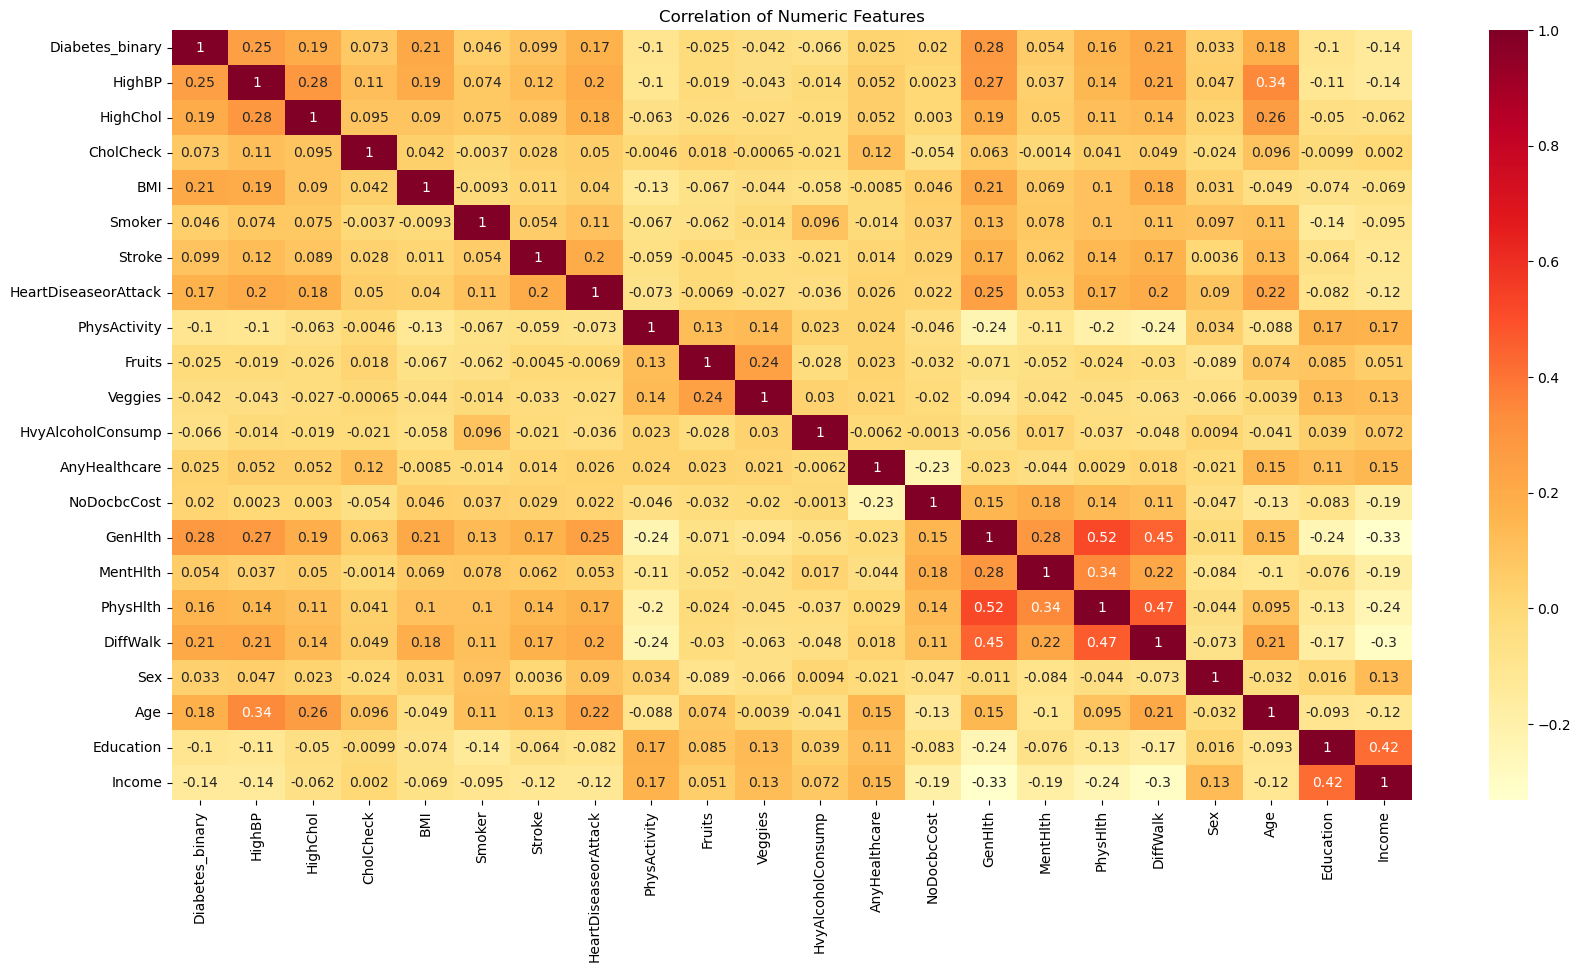

In [50]:
#using heatmap to understand correlation better in dataset data 
#Heatmap of correlation


plt.figure(figsize=(20, 10))
sns.heatmap(data.select_dtypes(include=[np.number]).corr(), annot=True, cmap='YlOrRd')
plt.title("Correlation of Numeric Features")
plt.show()


Correlation heatmap show the relationship between columns:

(GenHlth ,PhysHlth ),(PhysHlth , DiffWalk),(GenHlth ,DiffWalk )are highly correlated with each other => **positive relation**


(GenHlth ,Income ) , (DiffWalk , Income) are highly correlated with each other => **Negative relation**

__________________________________________________________________________________________________________________

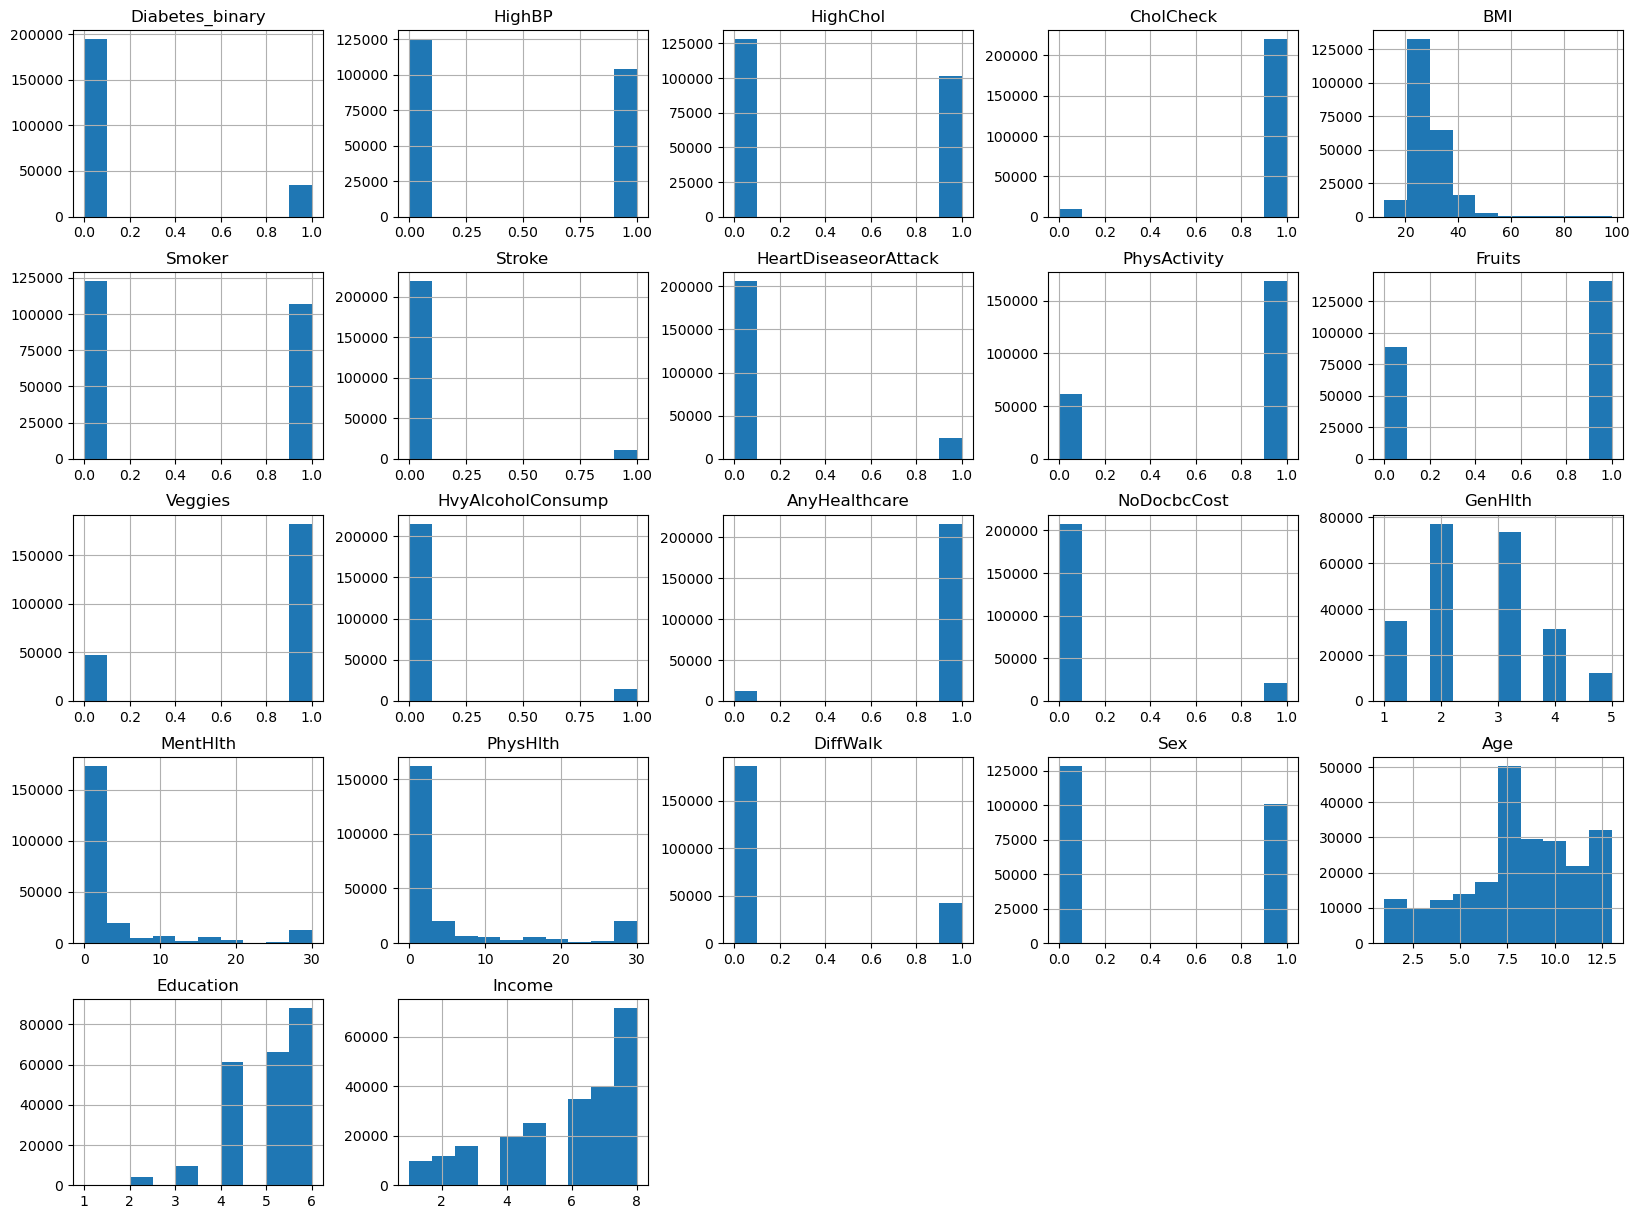

In [54]:
#using histogram to understand dataset data better

data.hist(figsize=(20,15));

____________________________________________________________________________________________________________________

**Visualization Of [Yes - NO] Columns and their relation with the target**

In [57]:
cols = ['HighBP', 'HighChol', 'CholCheck','Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

In [58]:
def create_plot_pivot(data2, x_column):
    """ Create a pivot table for satisfaction versus another rating for easy plotting. """
    _df_plot = data2.groupby([x_column, 'Diabetes_binary']).size() \
    .reset_index().pivot(columns='Diabetes_binary', index=x_column, values=0)
    return _df_plot

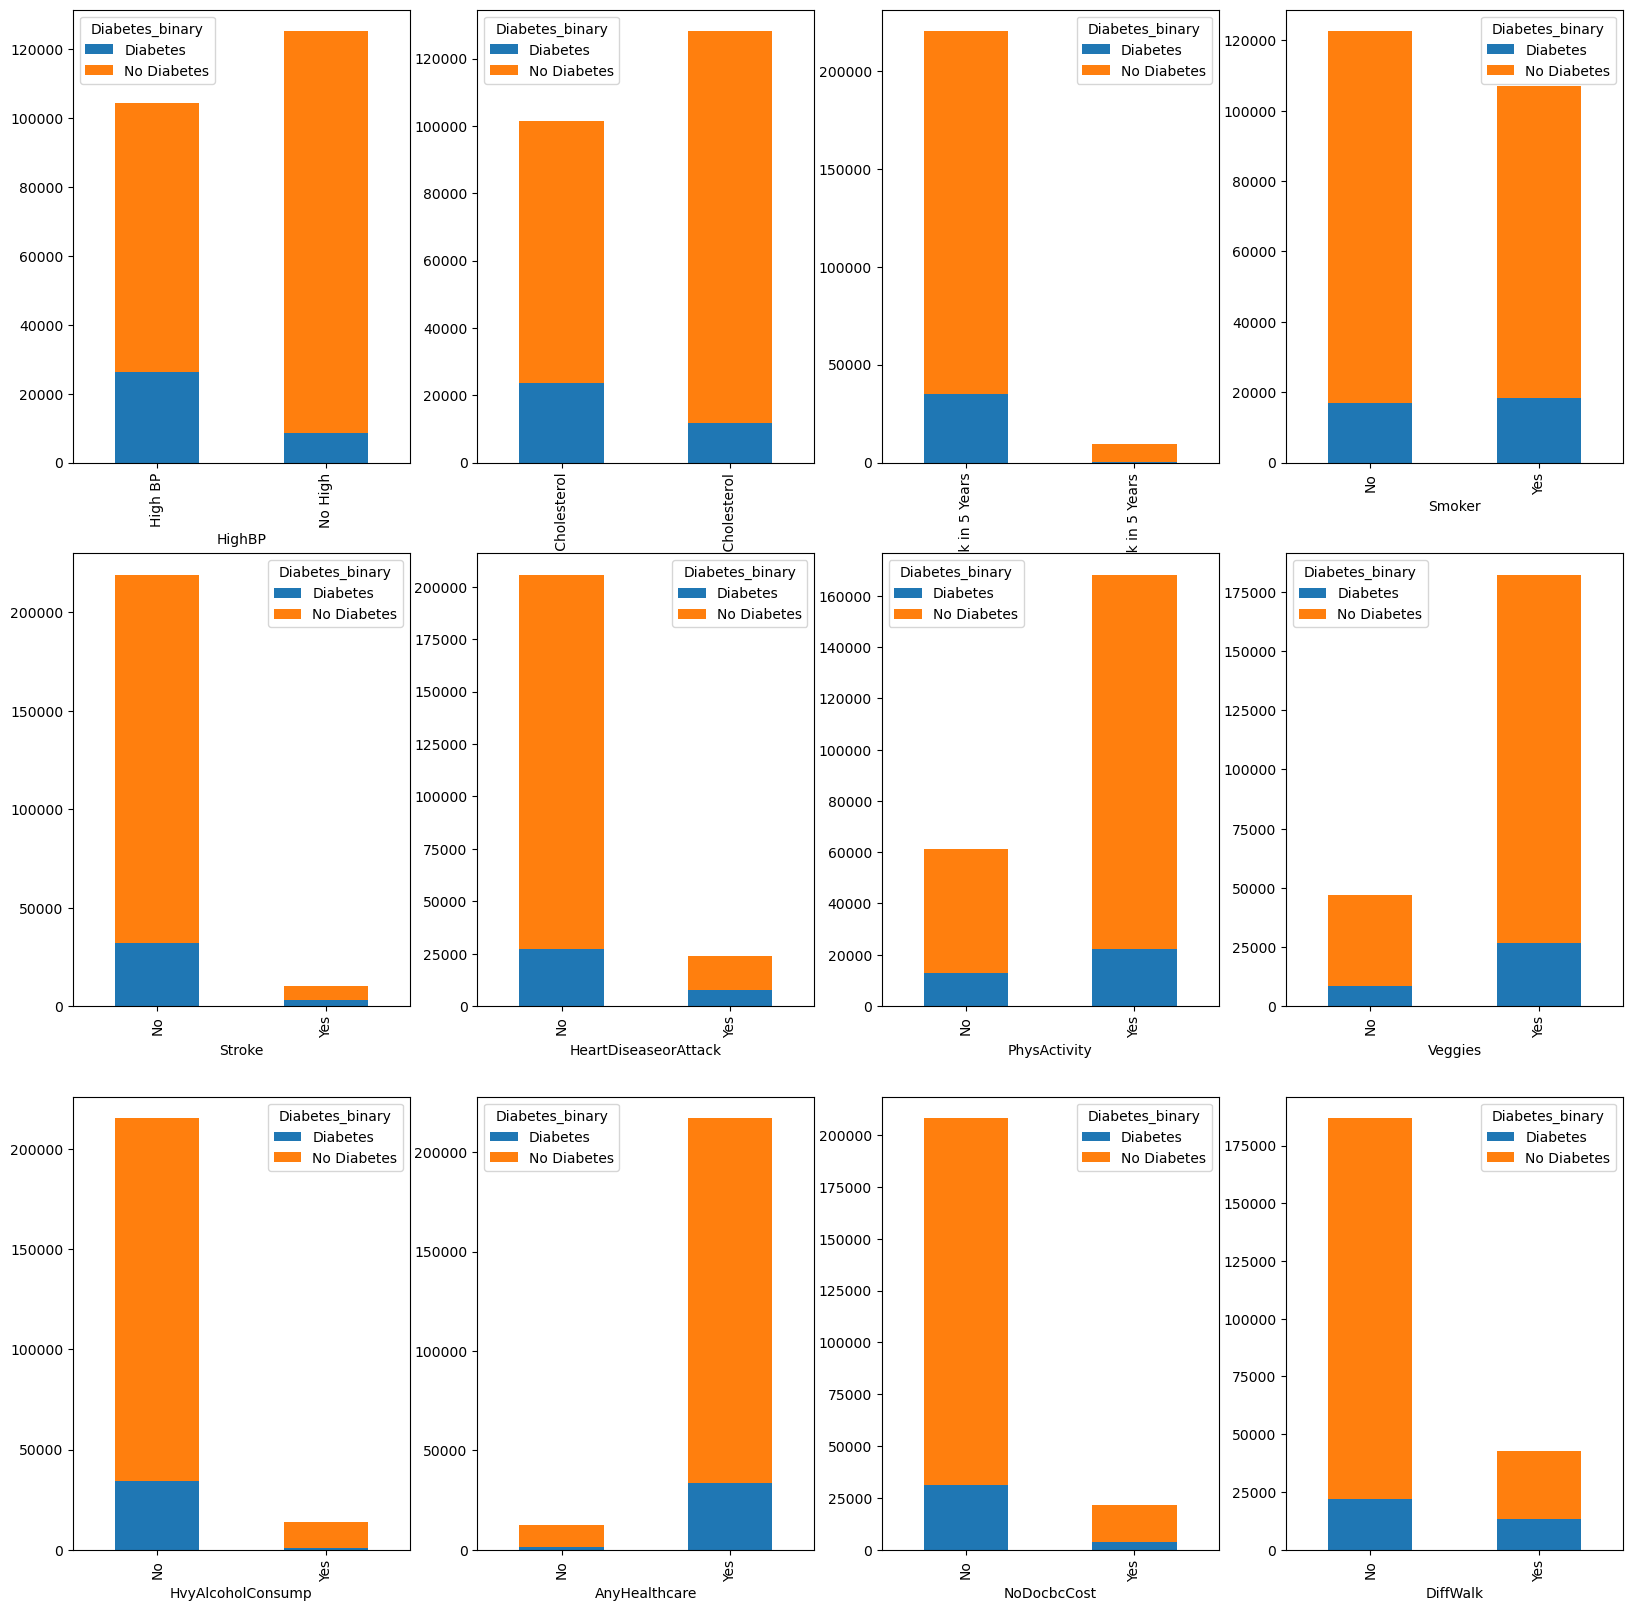

In [59]:
fig, ax = plt.subplots(3, 4, figsize=(20,20))
axe = ax.ravel()

c = len(cols)

for i in range(c):
    create_plot_pivot(data2, cols[i]).plot(kind='bar',stacked=True, ax=axe[i])
    axe[i].set_xlabel(cols[i])
    
fig.show()

______________________________________________________________________________________________________________

**View our target values "Diabetes_binary"**

In [62]:
#average of column Daibetes_binary 
# 0 for non-Diabetic person and 1 for Diabetic person

data2["Diabetes_binary"].value_counts()

Diabetes_binary
No Diabetes    194377
Diabetes        35097
Name: count, dtype: int64

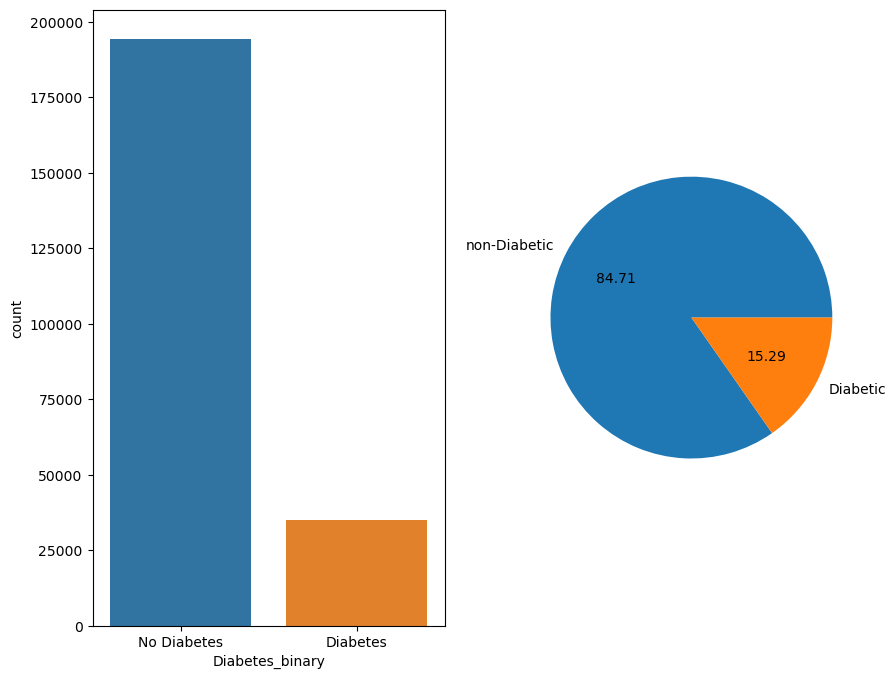

In [63]:
#checking the value count of Diabetes_binary_str by using countplot
figure1, plot1 = plt.subplots(1,2,figsize=(10,8))

sns.countplot(x='Diabetes_binary', data=data2, ax=plot1[0])



#checking diabetic and non diabetic pepoles average by pie 

labels=["non-Diabetic","Diabetic"]

plt.pie(data2["Diabetes_binary"].value_counts() , labels =labels ,autopct='%.02f' );


Our dataset has more instances of non-diabetics than those with diabetes or pre-diabetes 

_____________________________________________________________________________________________________________________

**"Age" and it's relation with the target**

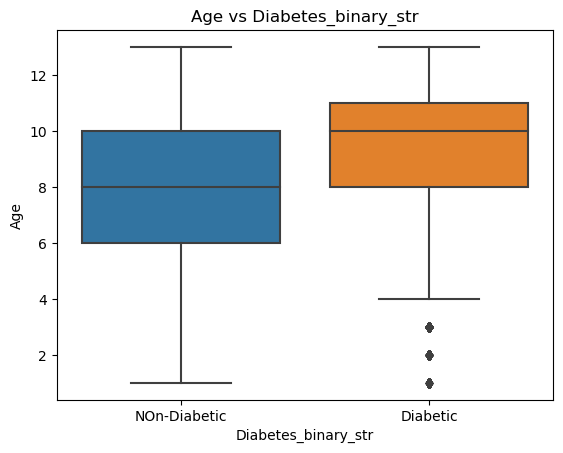

In [67]:
sns.boxplot(x = 'Diabetes_binary_str', y = 'Age', data = data)
plt.title('Age vs Diabetes_binary_str')
plt.show()

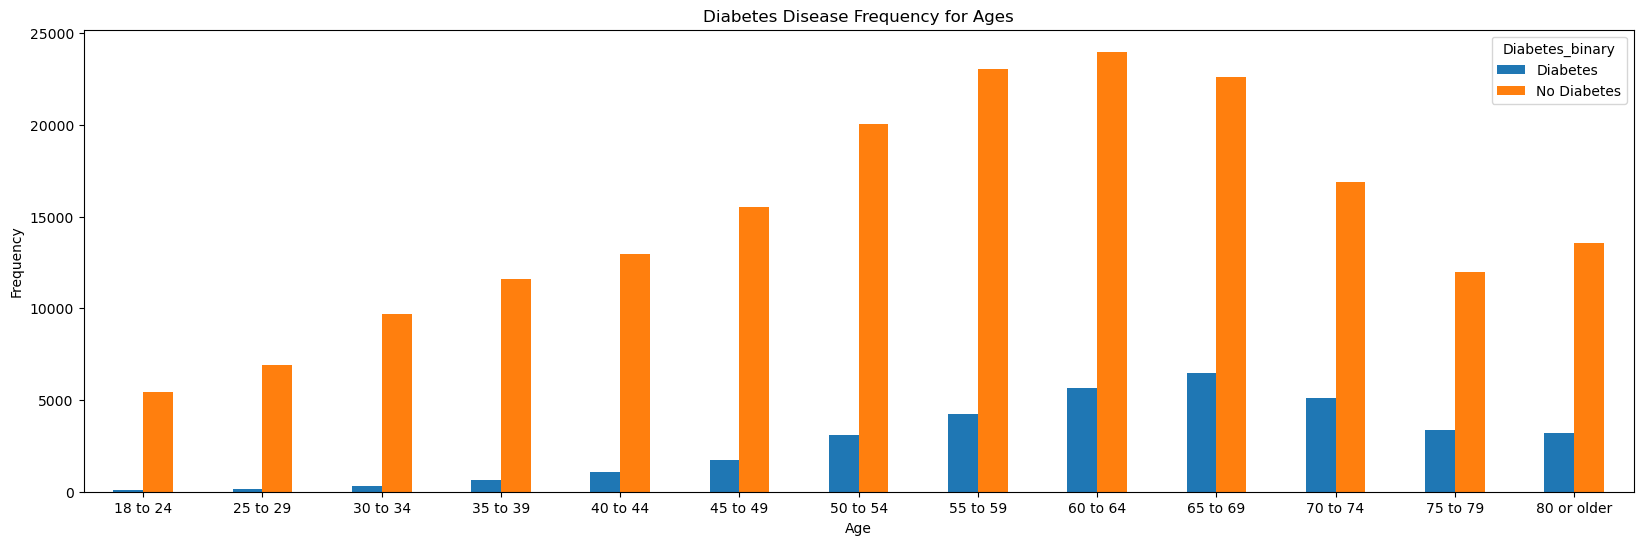

In [68]:
pd.crosstab(data2.Age,data2.Diabetes_binary).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()


As age increases, the chances of diabetes also increases. The median age of diabetic people is greater than that of non-diabetic people in our dataset.

______________________________________________________________________________________________________________________

**"Education" and it's relation with the target**

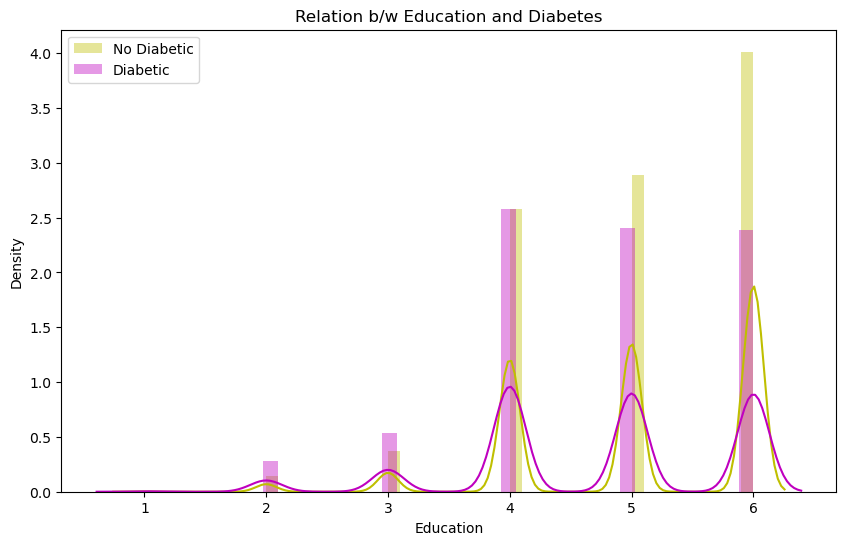

In [72]:
plt.figure(figsize=(10,6))


sns.distplot(data.Education[data.Diabetes_binary == 0], color="y", label="No Diabetic" )
sns.distplot(data.Education[data.Diabetes_binary == 1], color="m", label="Diabetic" )
plt.title("Relation b/w Education and Diabetes")

plt.legend()

Most subjects in our dataset have a high level of education. We see that the higher levels of education have higher proportions of healthy subjects.

_____________________________________________________________________________________________________________________

**"income" and it's relation with the target**

Text(0.5, 1.0, 'Relation b/w Income and Diabetes')

<Figure size 2000x1000 with 0 Axes>

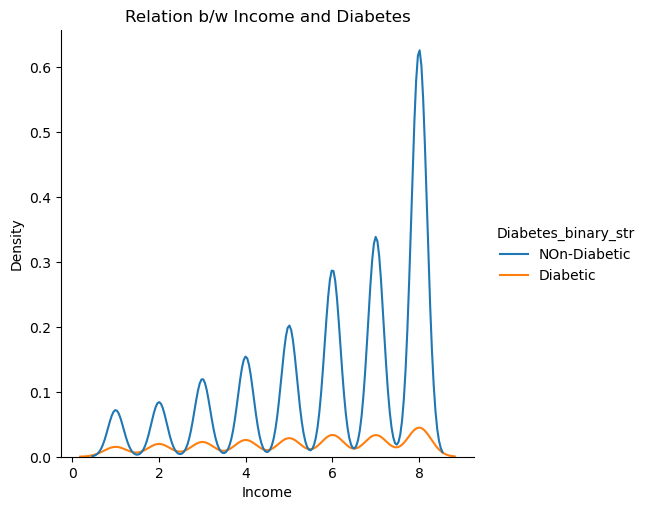

In [76]:
plt.figure(figsize=(20,10))

sns.displot(data=data, x="Income", hue="Diabetes_binary_str", kind="kde")
plt.title("Relation b/w Income and Diabetes")

A majority of people in our dataset have a high income. In the higher levels of income, we have more healthy people than in lower levels of income.

______________________________________________________________________________________________________________________

**"BMI" and it's relation with the target**

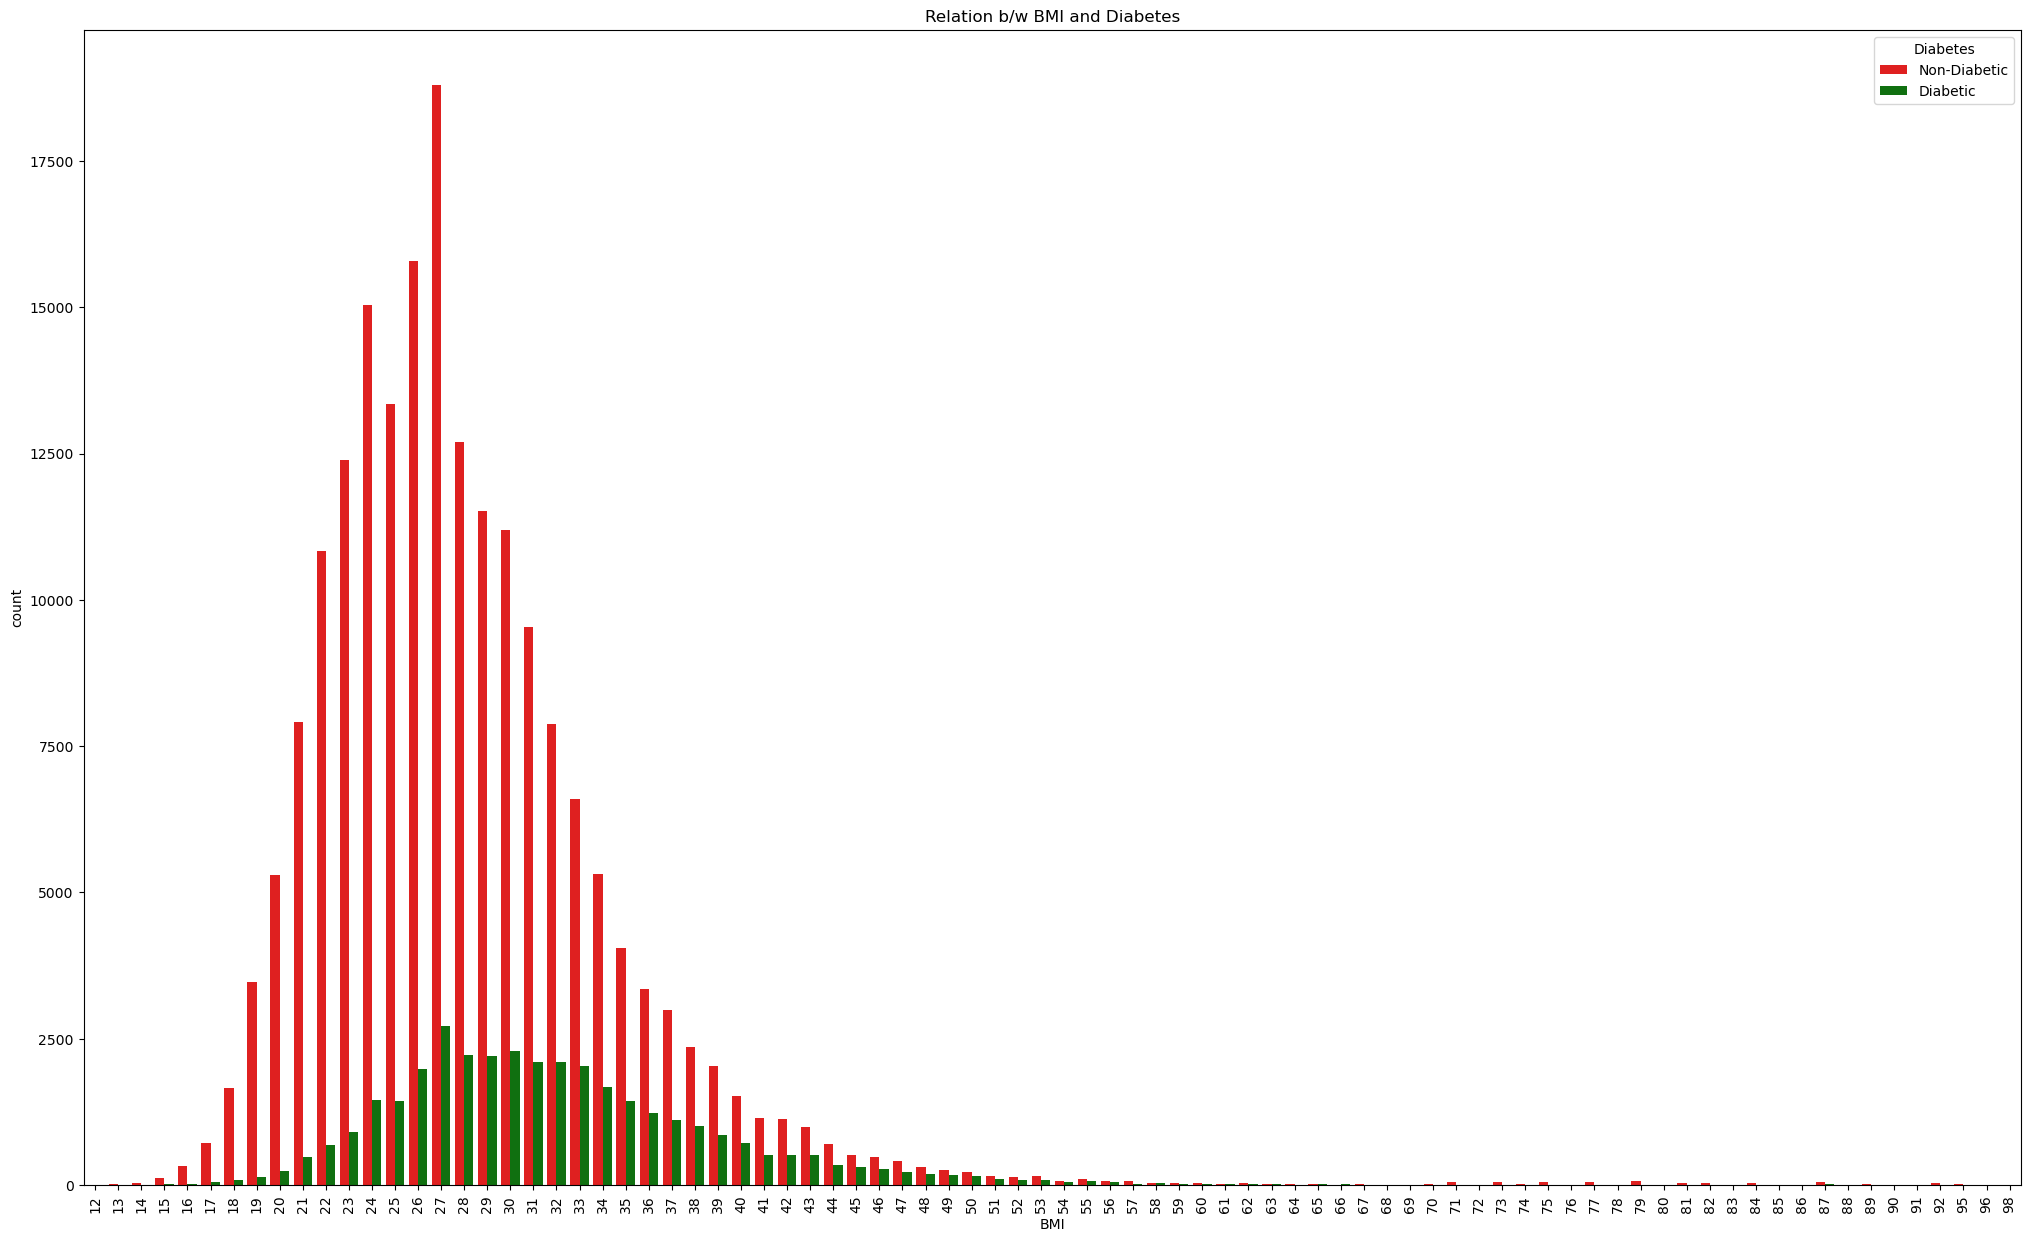

In [80]:
#count plot to see numbers of Diabetic and non Diabetic patient of Group two BMI 

plt.figure(figsize=(25, 15))
sns.countplot(x='BMI', hue='Diabetes_binary', data=data, palette={0: "r", 1: "g"})
plt.title("Relation b/w BMI and Diabetes")
plt.legend(title="Diabetes", labels=["Non-Diabetic", "Diabetic"])
plt.xticks(rotation=90)
plt.show()


Subjects with a BMI in the range of 24-33 are more likely to have diabetes or pre-diabetes.

________________________________________________________________________________________________________________________

**"MentHlth" and it's relation with the target**

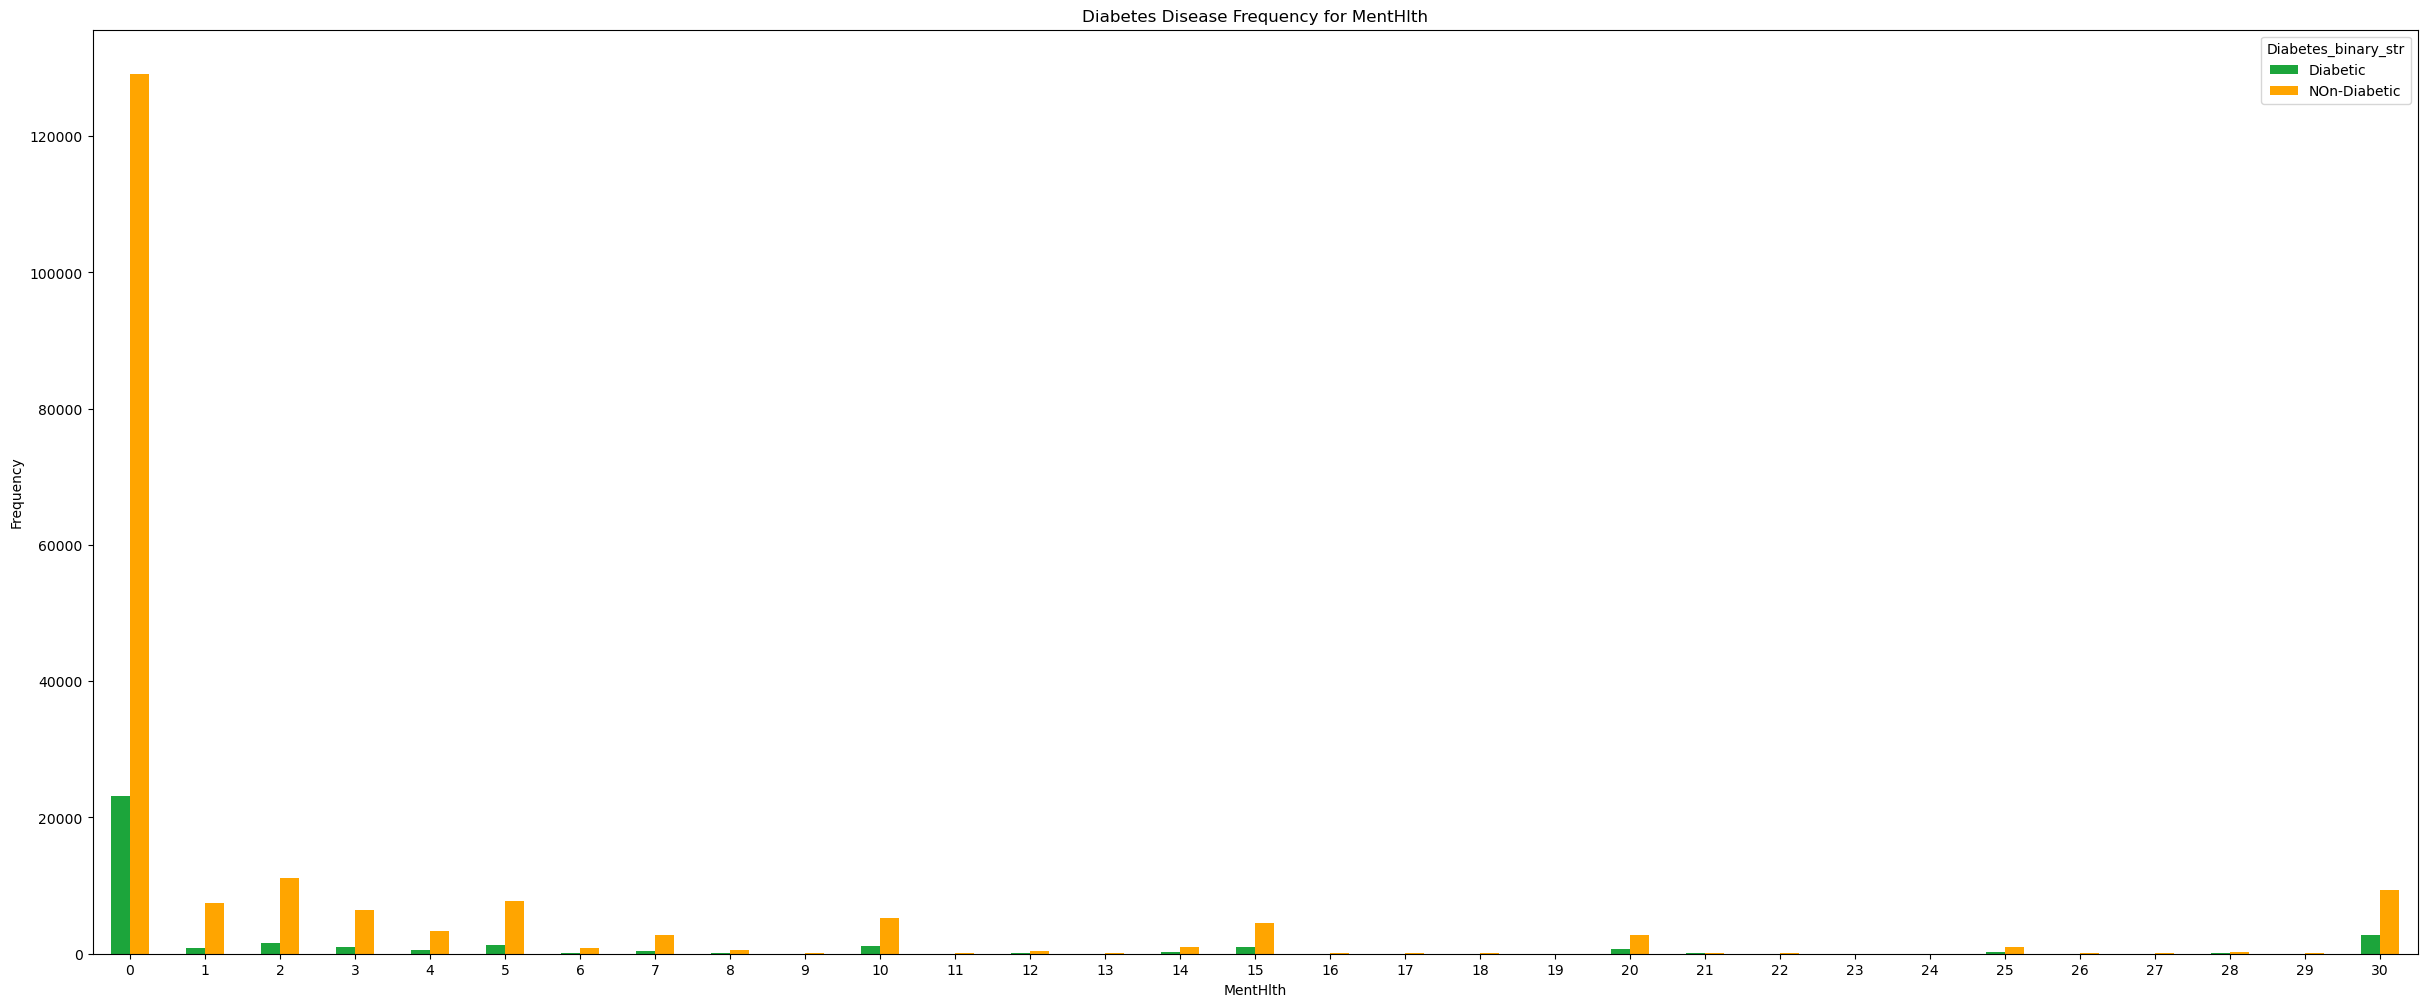

In [84]:
pd.crosstab(data.MentHlth,data.Diabetes_binary_str).plot(kind="bar",figsize=(30,12),color=['#1CA53B', '#FFA500' ])
plt.title('Diabetes Disease Frequency for MentHlth')
plt.xlabel('MentHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

In our dataset people who experienced 0-5 of poor mental health days in the past month have higher rates of diabetes and pre-diabetes.

____________________________________________________________________________________________________________________

**"PhysHlth" and it's relation with the target**

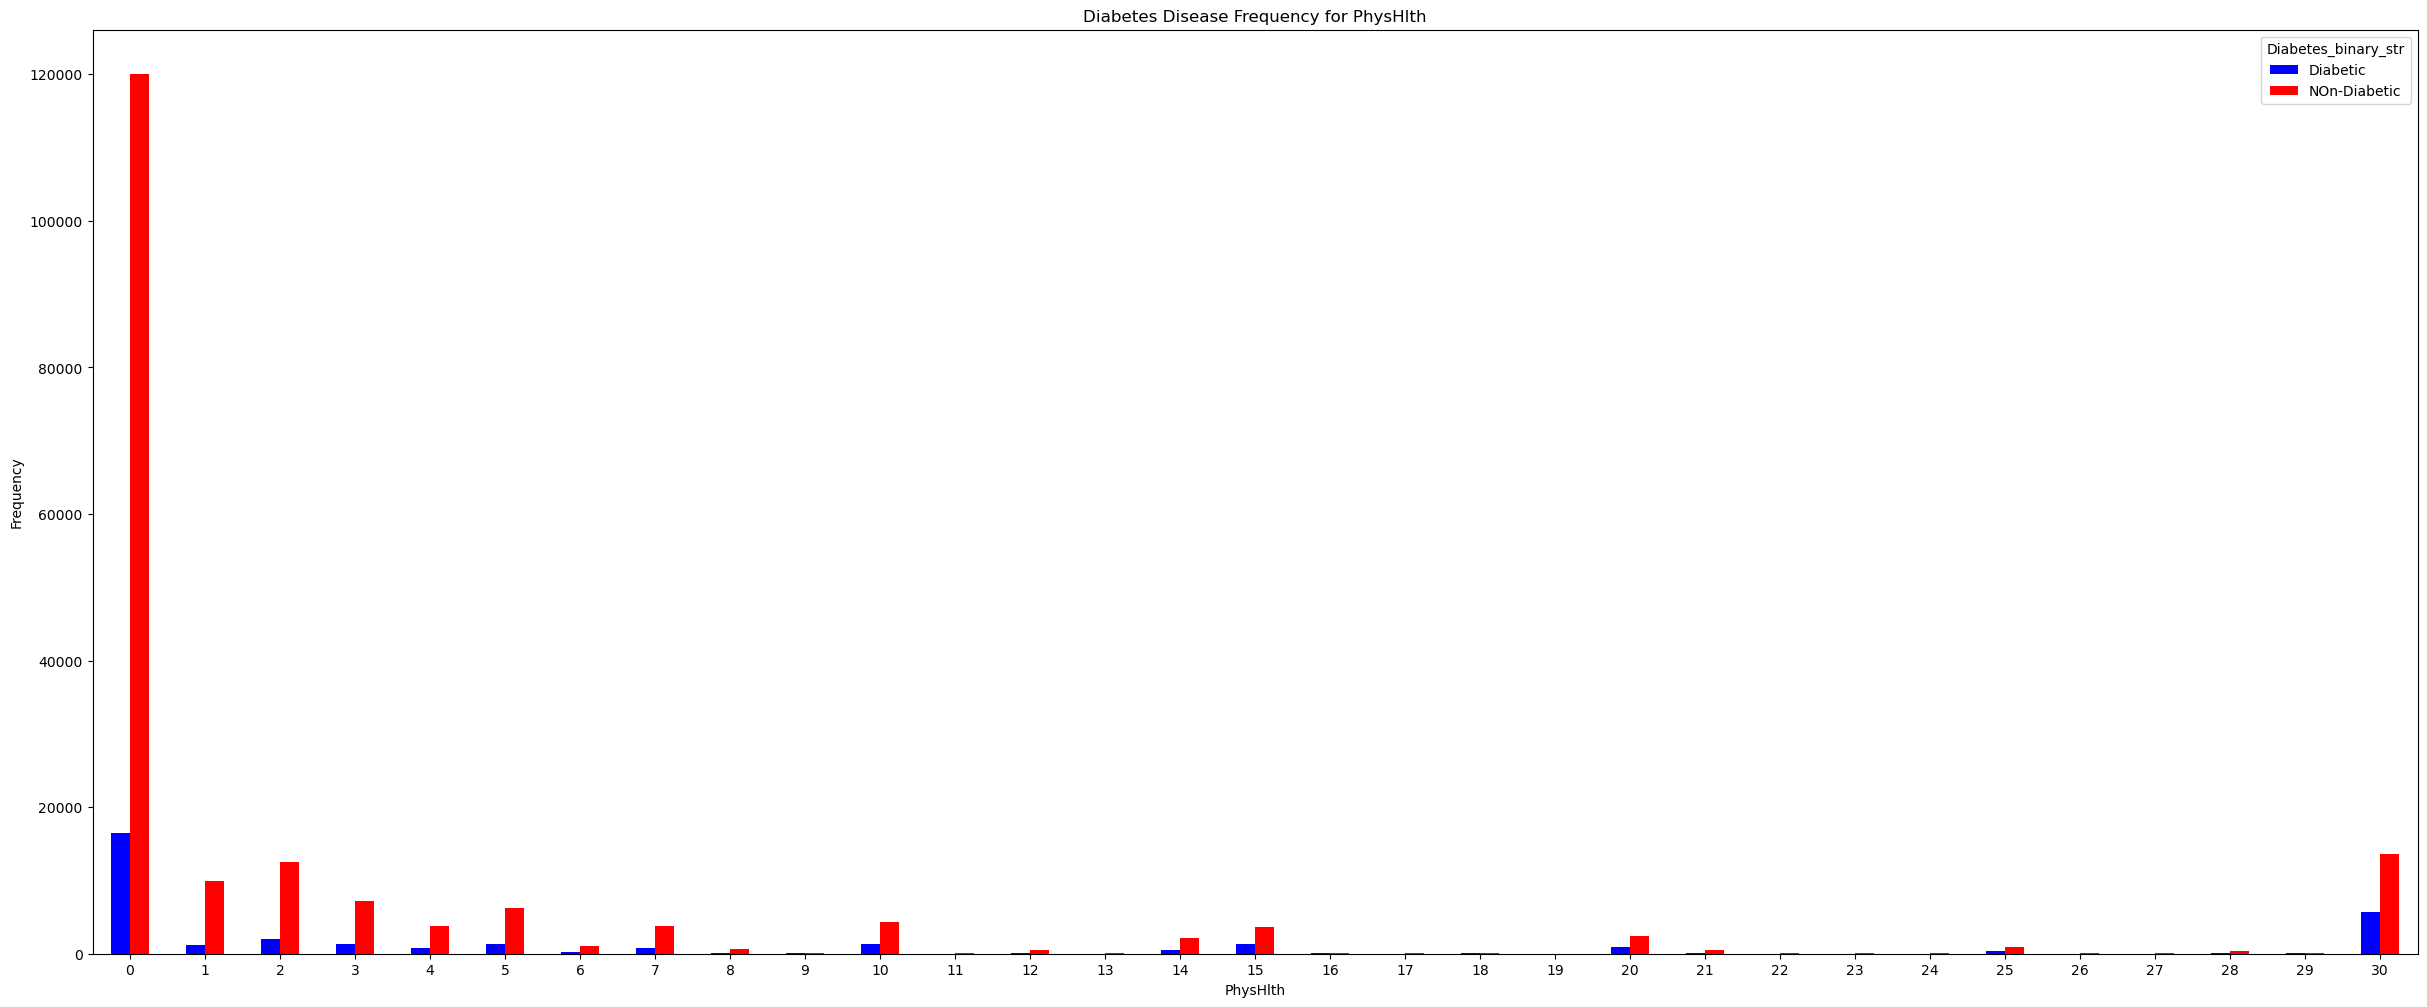

In [88]:
pd.crosstab(data.PhysHlth,data.Diabetes_binary_str).plot(kind="bar",figsize=(30,12),color=['Blue', 'Red' ])
plt.title('Diabetes Disease Frequency for PhysHlth')
plt.xlabel('PhysHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

In our dataset people who experienced 0-5 days of poor physical health in the past month have higher rates of diabetes and pre-diabetes.

______________________________________________________________________________________________________________________

**"GenHlth" and it's relation with the target**

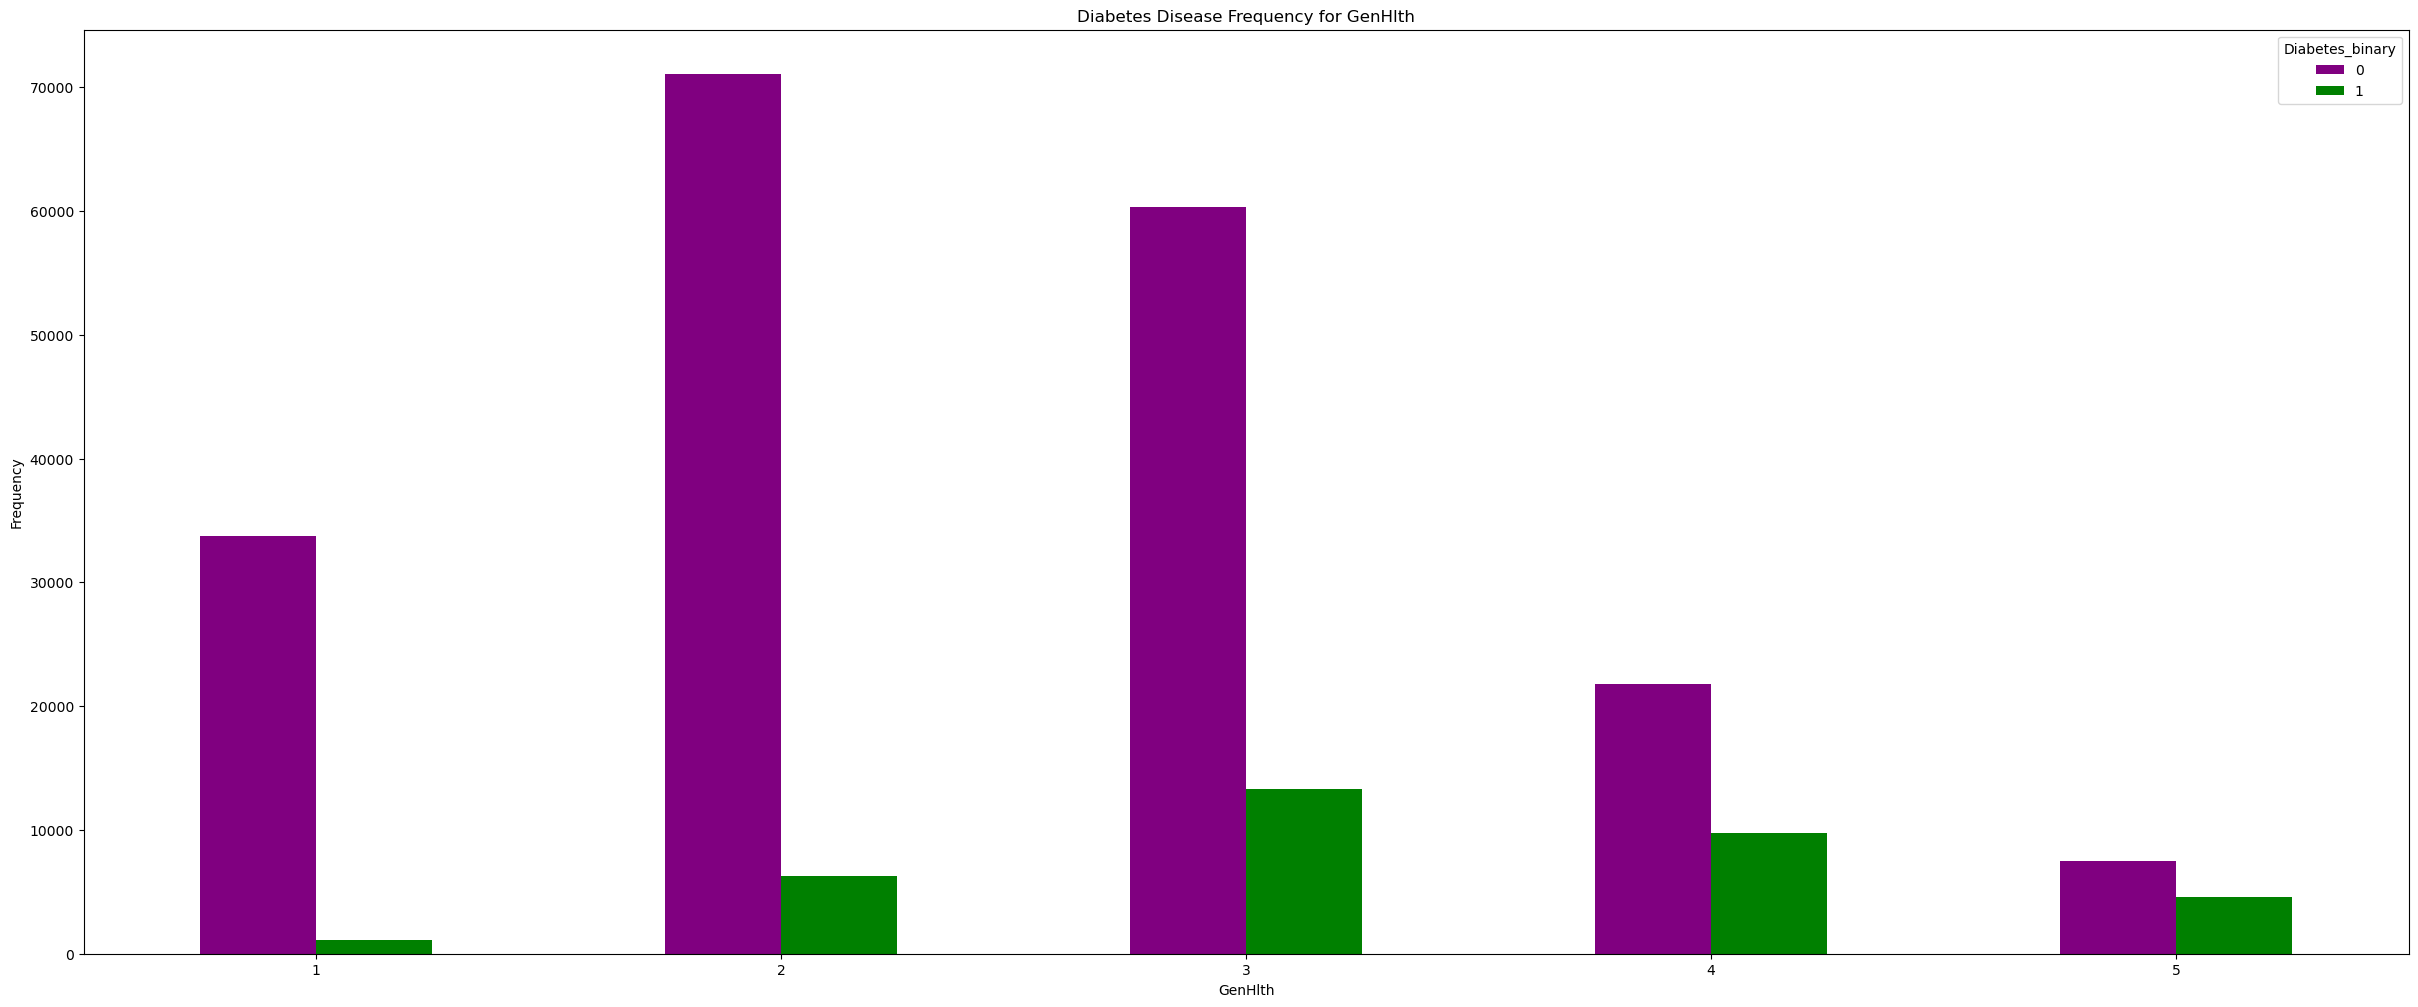

In [92]:
pd.crosstab(data.GenHlth,data.Diabetes_binary).plot(kind="bar",figsize=(30,12),color=['Purple', 'Green' ])
plt.title('Diabetes Disease Frequency for GenHlth')
plt.xlabel('GenHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

Most people have general health scores between 1-3. Also, a significant portion of 4-5 have diabetes or prediabetes.

_________________________________________________________________________________________________________________

# Feature Selections

__________________________________________________________________________________________________________________

**Correlation**

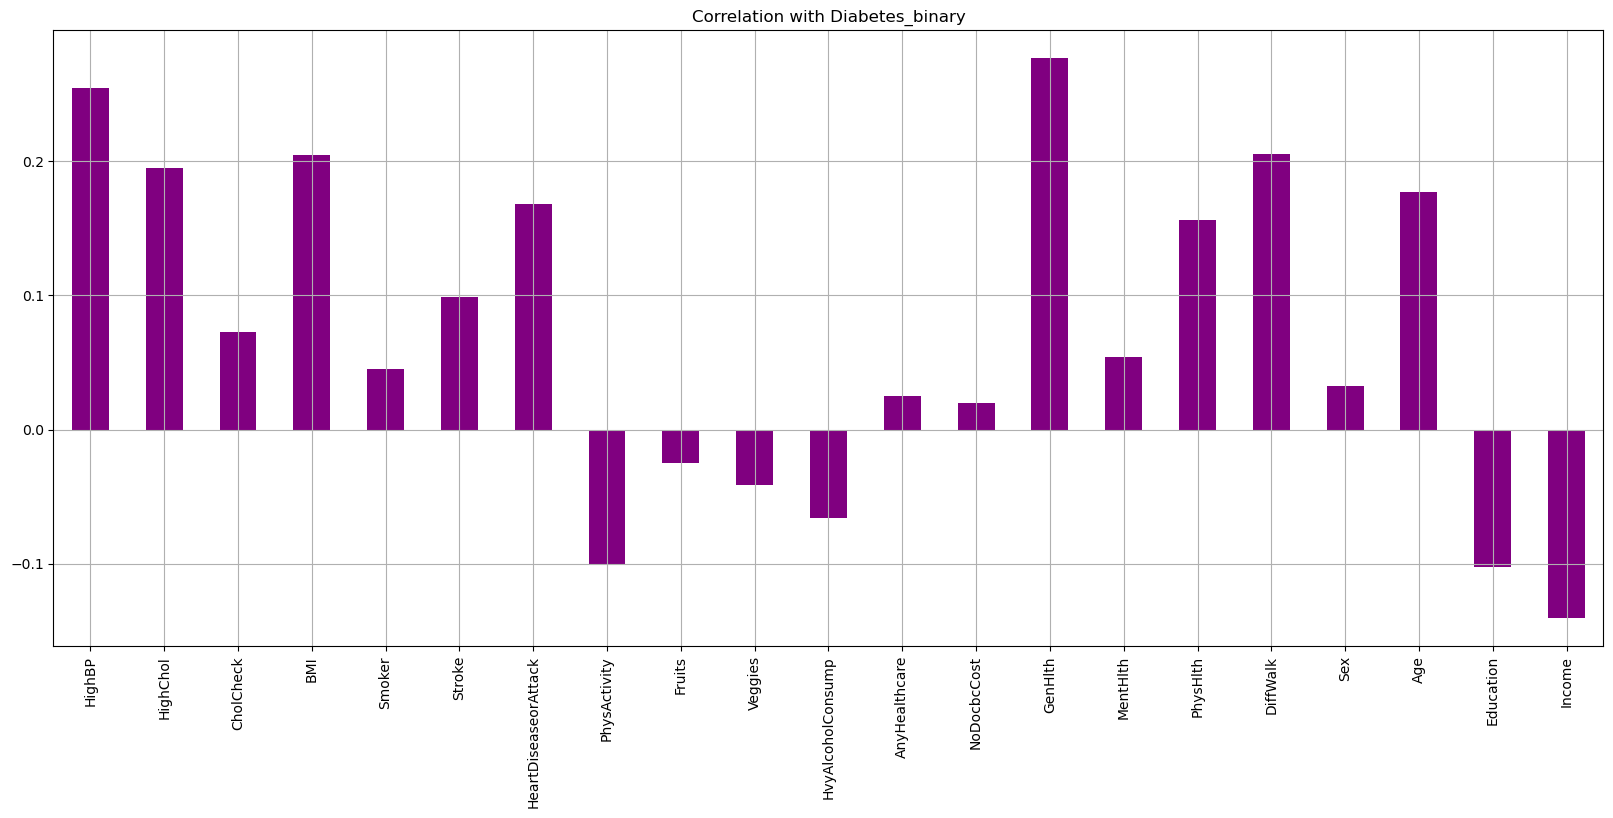

In [98]:
data.select_dtypes(include=[np.number]) \
    .drop('Diabetes_binary', axis=1) \
    .corrwith(data['Diabetes_binary']) \
    .plot(kind='bar', grid=True, figsize=(20, 8),
          title="Correlation with Diabetes_binary", color="Purple")
plt.show()


**Diabetes_binary's relation with other features as observed in our bar graph:**

1. Fruits , AnyHealthcare , NoDocbccost and sex are least correlated with Diabetes_binary.

2. HighBP , HighChol , BMI , smoker , stroke , HeartDiseaseorAttack , PhysActivity , Veggies , MentHlth , HvyAlcoholconsump , GenHlth , PhysHlth , Age , Education , Income and DiffWalk have a significant correlation with Diabetes_binary.

_______________________________________________________________________________________________________________________________

**VIF Test**

In [102]:


def calc_VIF(x):
    vif= pd.DataFrame()
    vif['variables']=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

    return(vif)


X = add_constant(Orginal_data)  
ds=pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],index=X.columns)  
print(ds)

const                   116.856706
Diabetes_binary           1.193120
HighBP                    1.344502
HighChol                  1.180932
CholCheck                 1.033501
BMI                       1.160280
Smoker                    1.091872
Stroke                    1.081612
HeartDiseaseorAttack      1.175776
PhysActivity              1.157396
Fruits                    1.112540
Veggies                   1.112397
HvyAlcoholConsump         1.025418
AnyHealthcare             1.113209
NoDocbcCost               1.144200
GenHlth                   1.821914
MentHlth                  1.239497
PhysHlth                  1.623288
DiffWalk                  1.536636
Sex                       1.075748
Age                       1.354954
Education                 1.326495
Income                    1.505649
dtype: float64


___________________________________________________________________________________________________

**ANOVA Test**

In [105]:
X = Orginal_data.iloc[:,1:]
Y = Orginal_data.iloc[:,0]

In [106]:
# ANOVA feature selection for numeric input and categorical output


# define feature selection
fs = SelectKBest(score_func=f_classif, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, Y)
print(X_selected.shape)

(253680, 10)


In [107]:
pd.DataFrame(X_selected).head(3)

0    1     2    3    4     5    6    7    8    9
0  1.0  1.0  40.0  0.0  5.0  15.0  1.0  9.0  4.0  3.0
1  0.0  0.0  25.0  0.0  3.0   0.0  0.0  7.0  6.0  1.0
2  1.0  1.0  28.0  0.0  5.0  30.0  1.0  9.0  4.0  8.0

________________________________________________________________________________________________________________

**Chi Square**

In [110]:
#apply SelectKBest class to extract top 10 best features
BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(X,Y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

#concatenating two dataframes for better visualization
f_Scores = pd.concat([df_columns,df_scores],axis=1)               # feature scores
f_Scores.columns = ['Feature','Score']

f_Scores

Feature          Score
0                 HighBP   10029.013935
1               HighChol    5859.710582
2              CholCheck      39.716825
3                    BMI   18355.166400
4                 Smoker     521.978858
5                 Stroke    2725.225194
6   HeartDiseaseorAttack    7221.975378
7           PhysActivity     861.887532
8                 Fruits     154.291404
9                Veggies     153.169215
10     HvyAlcoholConsump     779.424807
11         AnyHealthcare       3.280938
12           NoDocbcCost     229.542412
13               GenHlth    9938.507776
14              MentHlth   21029.632228
15              PhysHlth  133424.406534
16              DiffWalk   10059.506391
17                   Sex     140.248274
18                   Age    9276.141199
19             Education     756.035496
20                Income    4829.816361

In [111]:
print(f_Scores.nlargest(16,'Score'))

                 Feature          Score
15              PhysHlth  133424.406534
14              MentHlth   21029.632228
3                    BMI   18355.166400
16              DiffWalk   10059.506391
0                 HighBP   10029.013935
13               GenHlth    9938.507776
18                   Age    9276.141199
6   HeartDiseaseorAttack    7221.975378
1               HighChol    5859.710582
20                Income    4829.816361
5                 Stroke    2725.225194
7           PhysActivity     861.887532
10     HvyAlcoholConsump     779.424807
19             Education     756.035496
4                 Smoker     521.978858
12           NoDocbcCost     229.542412


In [112]:
#there are the features which we will use in our model

We will use those features in our model

"Fruits" , "Veggies" , "Sex" , "CholCheck" , " AnyHealthcare" will not be utilized

In [115]:
colomns = ["Fruits" , "Veggies" , "Sex" , "CholCheck" , "AnyHealthcare" , "Diabetes_binary_str"]

In [116]:
data.drop(colomns , axis= 1 ,inplace=True)

________________________________________________________________________________________________________________________

# Data Splitting 

In [119]:
X=data.drop("Diabetes_binary",axis=1)
Y=data["Diabetes_binary"]

______________________________________________________________________________________________________

# Dealing with imbalancing

In [122]:
Y.value_counts()

Diabetes_binary
0    194377
1     35097
Name: count, dtype: int64

In [123]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(version = 1 , n_neighbors = 10)

x_sm,y_sm= nm.fit_resample(X,Y)

In [124]:
y_sm.shape , x_sm.shape

((70194,), (70194, 16))

In [125]:
y_sm.value_counts()

Diabetes_binary
0    35097
1    35097
Name: count, dtype: int64

In [126]:
X_train , X_test , Y_train , Y_test = train_test_split(x_sm,y_sm, test_size=0.3 , random_state=42)

_______________________________________________________________________________________________________________________

# Data Scaling

In [129]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

_________________________________________________________________________________________________________________

# Modeling

____________________________________________________________________________________________________

**Logistic Regression**

In [134]:
lg = LogisticRegression(max_iter = 1500)
lg.fit(X_train , Y_train)

LogisticRegression(max_iter=1500)

In [135]:
# make predictions on test set
y_pred=lg.predict(X_test)

print('Training set score: {:.4f}'.format(lg.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(lg.score(X_test, Y_test)))

Training set score: 0.8511
Test set score: 0.8472


In [136]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.15276128970986277
Root Mean Squared Error : 0.39084688780884874


In [137]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.80      0.93      0.86     10468
           1       0.92      0.76      0.83     10591

    accuracy                           0.85     21059
   macro avg       0.86      0.85      0.85     21059
weighted avg       0.86      0.85      0.85     21059



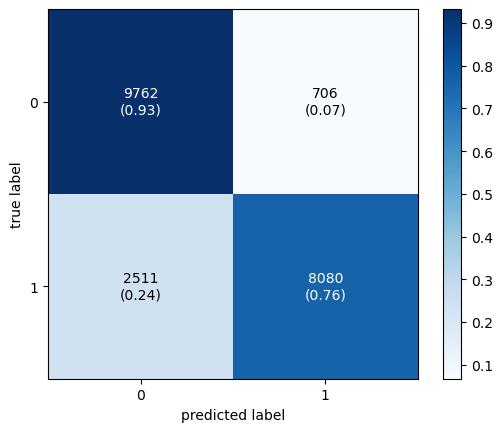

In [138]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Desicion Tree**

In [140]:
dt = DecisionTreeClassifier( max_depth= 12)
dt.fit(X_train , Y_train)

DecisionTreeClassifier(max_depth=12)

In [141]:
# make predictions on test set
y_pred=dt.predict(X_test)

print('Training set score: {:.4f}'.format(dt.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(dt.score(X_test, Y_test)))

Training set score: 0.8658
Test set score: 0.8476


In [142]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.1523814046251009
Root Mean Squared Error : 0.390360608444424


In [143]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.78      0.96      0.86     10468
           1       0.95      0.74      0.83     10591

    accuracy                           0.85     21059
   macro avg       0.87      0.85      0.85     21059
weighted avg       0.87      0.85      0.85     21059



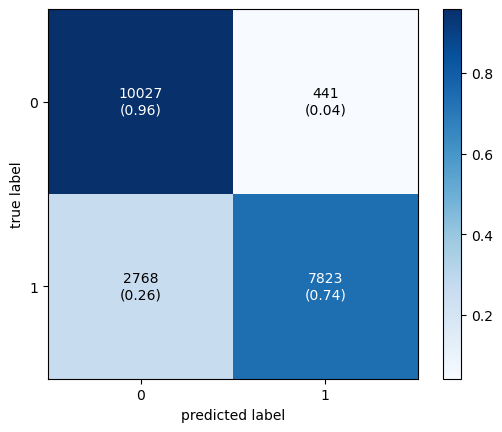

In [144]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**K-Nearest Neighbors**

In [146]:
knn = KNeighborsClassifier(n_neighbors= 6 )
knn.fit(X_train , Y_train)

KNeighborsClassifier(n_neighbors=6)

In [147]:
# make predictions on test set
y_pred=knn.predict(X_test)

print('Training set score: {:.4f}'.format(knn.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, Y_test)))

Training set score: 0.8423
Test set score: 0.8049


In [148]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.19507099102521488
Root Mean Squared Error : 0.44166841750935154


In [149]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.73      0.95      0.83     10468
           1       0.93      0.66      0.77     10591

    accuracy                           0.80     21059
   macro avg       0.83      0.81      0.80     21059
weighted avg       0.83      0.80      0.80     21059



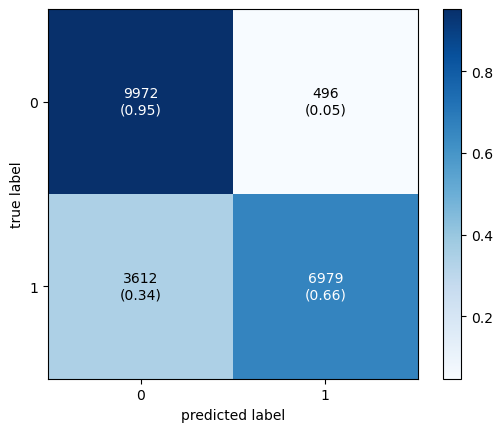

In [150]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Random Forest**

In [152]:
rf = RandomForestClassifier(max_depth=12 ,n_estimators =10, random_state=42 )

# fitting the model on the train data
rf.fit(X_train, Y_train)


RandomForestClassifier(max_depth=12, n_estimators=10, random_state=42)

In [153]:
# make predictions on test set
y_pred=rf.predict(X_test)

print('Training set score: {:.4f}'.format(rf.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(rf.score(X_test, Y_test)))

Training set score: 0.8713
Test set score: 0.8588


In [154]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.14117479462462604
Root Mean Squared Error : 0.375732344395084


In [155]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.80      0.95      0.87     10468
           1       0.94      0.77      0.85     10591

    accuracy                           0.86     21059
   macro avg       0.87      0.86      0.86     21059
weighted avg       0.87      0.86      0.86     21059



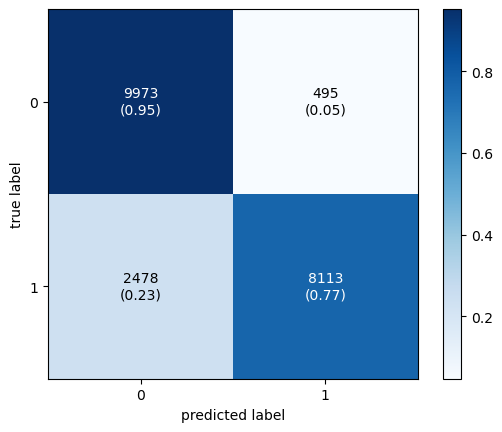

In [156]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Support Vector Machines**

In [158]:
from sklearn.svm import SVC

# define the model
clf = SVC(kernel='rbf', C=1.0)

# train the model
clf.fit(X_train, Y_train)

y_pred=clf.predict(X_test)

print('Training set score: {:.4f}'.format(clf.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, Y_test)))

Training set score: 0.8687
Test set score: 0.8603


In [159]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.13970273992117385
Root Mean Squared Error : 0.37376829710553816


In [160]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.80      0.96      0.87     10468
           1       0.95      0.76      0.85     10591

    accuracy                           0.86     21059
   macro avg       0.88      0.86      0.86     21059
weighted avg       0.88      0.86      0.86     21059



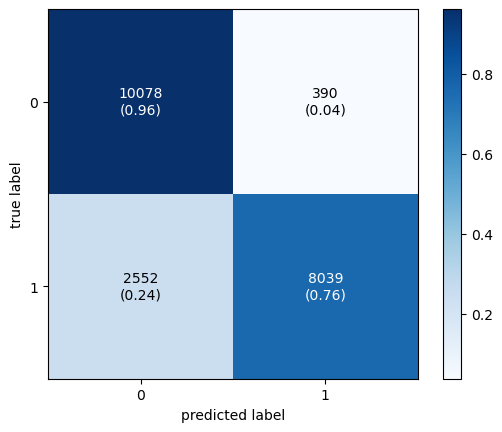

In [161]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**eXtreme Gradient Boosting**

In [163]:
from xgboost import XGBClassifier
xg = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
xg.fit(X_train , Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [164]:
y_pred=xg.predict(X_test)

print('Training set score: {:.4f}'.format(xg.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(xg.score(X_test, Y_test)))

Training set score: 0.8769
Test set score: 0.8127


In [165]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.18728334678759676
Root Mean Squared Error : 0.4327624600027095


In [166]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82     10468
           1       0.85      0.76      0.80     10591

    accuracy                           0.81     21059
   macro avg       0.82      0.81      0.81     21059
weighted avg       0.82      0.81      0.81     21059



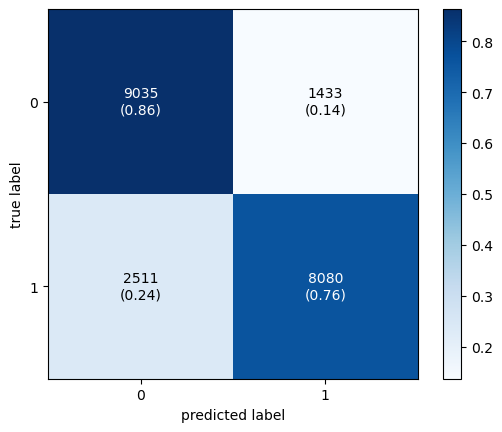

In [167]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [168]:
!pip install ace_tools


Model Performance Comparison:

           Model  Accuracy  Precision    Recall  F1 Score   AUC-ROC       MSE  \
3            SVM  0.860297   0.953731  0.759041  0.845321       NaN  0.139703   
2  Random Forest  0.858825   0.942495  0.766028  0.845148  0.920258  0.141175   
0  Decision Tree  0.847619   0.946636  0.738646  0.829806  0.903741  0.152381   
4        XGBoost  0.812717   0.849364  0.762912  0.803820  0.875731  0.187283   
1            KNN  0.804929   0.933645  0.658956  0.772612  0.866719  0.195071   

       RMSE  
3  0.373768  
2  0.375732  
0  0.390361  
4  0.432762  
1  0.441668  


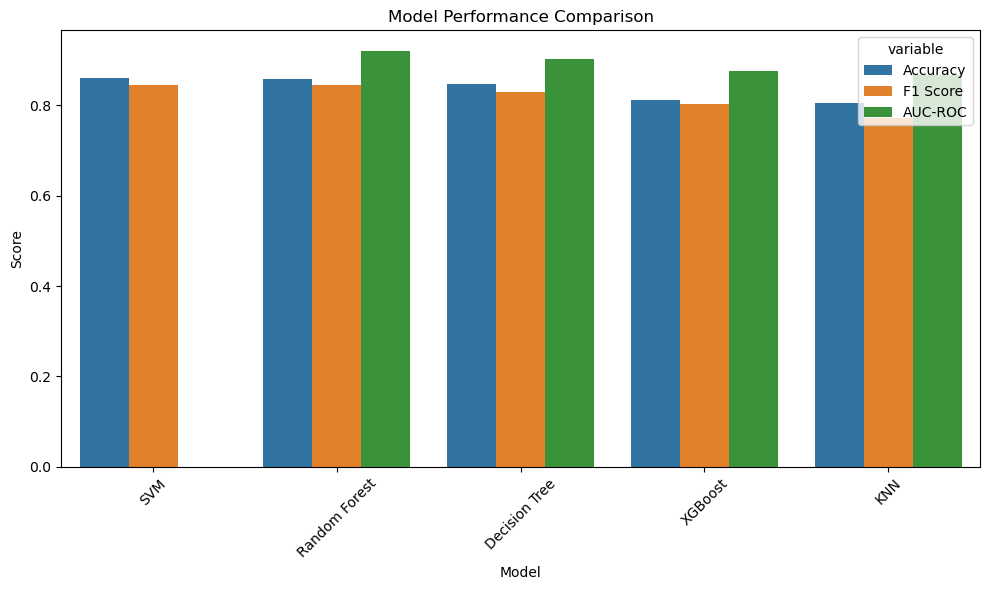

In [170]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of models and their names from your notebook
models = {
    "Decision Tree": dt,
    "KNN": knn,
    "Random Forest": rf,
    "SVM": clf,
    "XGBoost": xg
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(Y_test, y_pred)
    prec = precision_score(Y_test, y_pred)
    rec = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    auc = roc_auc_score(Y_test, y_prob) if y_prob is not None else np.nan
    mse = mean_squared_error(Y_test, y_pred)
    rmse = np.sqrt(mse)

    results.append([name, acc, prec, rec, f1, auc, mse, rmse])

# Create and display the DataFrame
columns = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "AUC-ROC", "MSE", "RMSE"]
comparison_df = pd.DataFrame(results, columns=columns)
comparison_df.sort_values(by="F1 Score", ascending=False, inplace=True)

# Display the DataFrame
print("\nModel Performance Comparison:\n")
print(comparison_df)

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(data=comparison_df.melt(id_vars="Model", value_vars=["Accuracy", "F1 Score", "AUC-ROC"]),
            x="Model", y="value", hue="variable")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [1]:
markdown_table = """
### **Model Evaluation Metrics for Diabetes Prediction**

| **Metric**     | **What It Measures** | **Best Used For** | **Where It Falls Short** | **Importance for Diabetes Prediction** | **Misleading Example** |
|----------------|----------------------|-------------------|---------------------------|-----------------------------------------|-------------------------|
| **Recall (Sensitivity)** | Proportion of actual positives correctly identified (`TP / (TP + FN)`) | Medical diagnoses, fraud detection, any scenario where missing a positive is dangerous | May produce many false positives if precision is low | ⭐⭐⭐⭐ **Very High** | A recall of 95% means it catches 95% of people with diabetes, but could wrongly label healthy people too |
| **F1 Score**   | Harmonic mean of precision and recall | Balanced evaluation where both false positives and false negatives matter | Doesn’t show class imbalance clearly | ⭐⭐⭐⭐ **Very High** | A high F1 can mask poor recall if precision is too high — e.g., a model predicting only the clearest diabetes cases |
| **AUC-ROC**    | Probability the model ranks a random positive higher than a random negative | Comparing classifier confidence; performance across all thresholds | Needs probability scores; not intuitive with severe imbalance | ⭐⭐⭐ **High** | A high AUC might hide the fact that few positives are ever predicted in reality |
| **Precision**  | Proportion of predicted positives that are actually positive (`TP / (TP + FP)`) | When false positives are costly (e.g., spam filters) | Doesn’t account for missed positives (low recall) | ⭐⭐ **Medium** | A precision of 95% sounds great, but may only detect a tiny fraction of diabetes cases |
| **Accuracy**   | Proportion of total correct predictions (`(TP + TN) / Total`) | Balanced datasets where both classes are equally important | Misleading in imbalanced datasets | ⭐ **Low** | A model predicting "no diabetes" for everyone might be 90% accurate if only 10% have it |
| **MSE / RMSE** | Average squared/root error between predicted and actual values | Regression problems (e.g., blood sugar levels) | Not intuitive or standard for classification | ⭐ **Very Low** | A lower RMSE doesn't mean better classification — two wrong class predictions may have the same error |
"""

ranking_summary = """
---

### **Recommended Metric Ranking for Diabetes Prediction:**

1. **Recall** — Catch as many true cases as possible
2. **F1 Score** — Best balance between catching cases and avoiding false alarms
3. **AUC-ROC** — How well the model separates classes
4. **Precision** — Useful, but less critical than recall
5. **Accuracy** — Only useful if the dataset is perfectly balanced
6. **MSE / RMSE** — Better suited for regression, not binary classification
"""

# Display the Markdown table and rankings
from IPython.display import Markdown, display

display(Markdown(markdown_table))
display(Markdown(ranking_summary))



### **Model Evaluation Metrics for Diabetes Prediction**

| **Metric**     | **What It Measures** | **Best Used For** | **Where It Falls Short** | **Importance for Diabetes Prediction** | **Misleading Example** |
|----------------|----------------------|-------------------|---------------------------|-----------------------------------------|-------------------------|
| **Recall (Sensitivity)** | Proportion of actual positives correctly identified (`TP / (TP + FN)`) | Medical diagnoses, fraud detection, any scenario where missing a positive is dangerous | May produce many false positives if precision is low | ⭐⭐⭐⭐ **Very High** | A recall of 95% means it catches 95% of people with diabetes, but could wrongly label healthy people too |
| **F1 Score**   | Harmonic mean of precision and recall | Balanced evaluation where both false positives and false negatives matter | Doesn’t show class imbalance clearly | ⭐⭐⭐⭐ **Very High** | A high F1 can mask poor recall if precision is too high — e.g., a model predicting only the clearest diabetes cases |
| **AUC-ROC**    | Probability the model ranks a random positive higher than a random negative | Comparing classifier confidence; performance across all thresholds | Needs probability scores; not intuitive with severe imbalance | ⭐⭐⭐ **High** | A high AUC might hide the fact that few positives are ever predicted in reality |
| **Precision**  | Proportion of predicted positives that are actually positive (`TP / (TP + FP)`) | When false positives are costly (e.g., spam filters) | Doesn’t account for missed positives (low recall) | ⭐⭐ **Medium** | A precision of 95% sounds great, but may only detect a tiny fraction of diabetes cases |
| **Accuracy**   | Proportion of total correct predictions (`(TP + TN) / Total`) | Balanced datasets where both classes are equally important | Misleading in imbalanced datasets | ⭐ **Low** | A model predicting "no diabetes" for everyone might be 90% accurate if only 10% have it |
| **MSE / RMSE** | Average squared/root error between predicted and actual values | Regression problems (e.g., blood sugar levels) | Not intuitive or standard for classification | ⭐ **Very Low** | A lower RMSE doesn't mean better classification — two wrong class predictions may have the same error |



---

### **Recommended Metric Ranking for Diabetes Prediction:**

1. **Recall** — Catch as many true cases as possible
2. **F1 Score** — Best balance between catching cases and avoiding false alarms
3. **AUC-ROC** — How well the model separates classes
4. **Precision** — Useful, but less critical than recall
5. **Accuracy** — Only useful if the dataset is perfectly balanced
6. **MSE / RMSE** — Better suited for regression, not binary classification
